# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования**

1. Определить рыночную стоимость объектов недвижимости.
2. Построть автоматизированную систему, которая отследит аномалии и мошенническую деятельность.
3. Установить, какие факторы влияют на ценообразование стоимости квартир.

**Ход исследования**
Данные о недвижимости получены из файла `'datasets/real_estate_data.csv'`. О качестве данных ничего не известно, поэтому перед тем, как приступать к целям исследования, понадобится обзор данных.

Проверим данные на ошибки и оценим их влияние на исследование. Затем, на этапе предобработки поищем возможности исправить все ошибки данных, которые не приведут к искажению конечного результат. Далее создадим необходимые столбцы и приступим к проведению исследовательского анализа.

Таким образом, исследование пройдет в семь этапов:

- Обзор данных
- Предобработка данных
- Расчеты и добавление результатов в таблицу
- Проведение анализа для Ленинградской области
- Проведение анализа для Санкт-Петербурга
- Установление различия факторов которые влияют на ценообразование стоимости квартир
- Написание общего вывода

### Откройте файл с данными и изучите общую информацию. 

#### Загрузка данных из файла

Первоначально импортируем библиотеки, которые нам понадобятся в работе.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Откроем файл с данными и взглянем на их состояние.

In [2]:
try:
    df = pd.read_csv('D:/learn_data/real_estate_data.csv', sep='\t')
except:
    df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Теперь данные открылись в формате более удобном как для визуального восприятия так и для дальнейшей работы. 

#### Изучение общей информации о полученном датафрейме

Как видим, датафрейм содержит 22 колонки, не так много, но нам всё же видны не все. Исправим этот момент.

In [3]:
pd.set_option('display.max_columns', None)
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,False,False,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,False,False,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Как видим уже из первых пяти строчек фрейма, в нем содержится большое количество попусков в различных колонках. Для более детального понимания взглянем на информацию о данных.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Сразу обращаем внимание на некорректное именование столбца `'cityCenters_nearest'`, которое несоответствует правилам *змеиного* наименования, в связи с чем переименуем его в `'city_centers_nearest'`.

In [5]:
df = df.rename(columns={'cityCenters_nearest': 'city_centers_nearest'})

Как видно из представленной информации, всего данные содержат сведения о 23699 объектах, при этом в большинстве колонок имеются сведения не обо всех объектах (всего 8 из 22 колонок полносью заполнены *non-null* значениями). Решением проблемы пропусков надо будет в дальнейшем заняться. Также отметим, что 2 колонки содержат буллевы значения, еще в 3 колонках значения имеют тип *object*, остальные заполнены различными числовыми значениями. Давайте взглянем на список их характерных значений.   

In [6]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


При взгляде на эти сведения сразу бросаются в глаза некоторые странности, в частности наличие квартир с высотой потолка как в **1 м**, так и **100 м**, что кажется явно неправдоподобным. Также довольно странными вылядят квартиры с жилой площадью **2 кв.м** или площадью кухни **1.3 кв.м** *(мне ивестно о наличии в мире микроквартир в японском стиле, но мы анализируем квартиры в России и такие габариты не прошли бы по различным ГОСТам, СНиПам, СанПиНам и т.п. для признания таких помещений жилыми в соответствии с законодательством)*, в то время как минимальная общая площадь квартиры **12 кв.м**, что уже можно считать правдоподобным.  

#### Построение общей гистограммы для количественных столбцов

Далее посмотрим на гистограммы для всех столбцов с числовыми значениями.

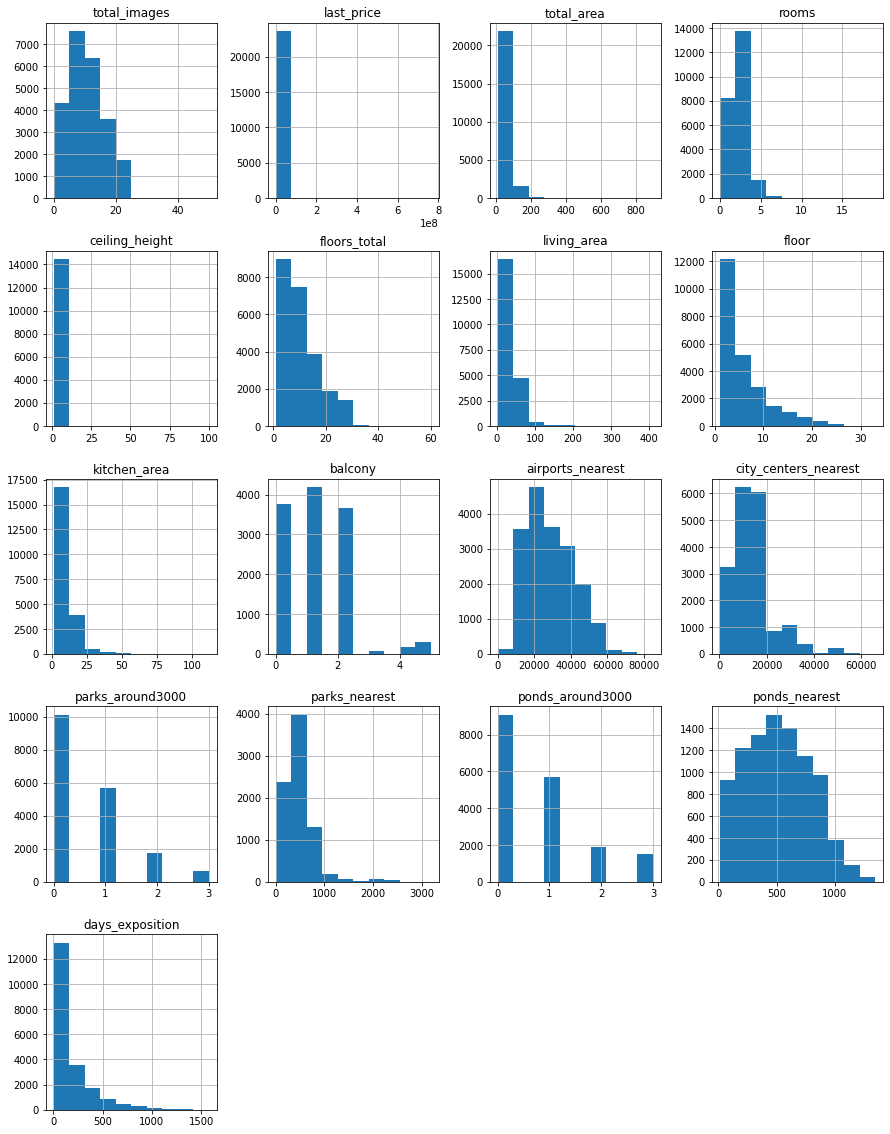

In [7]:
df.hist(figsize=(15, 20));

Мы видим в ряде гистограмм интересные результаты, например, наличие нескольких из них ярко выраженных столбцов, но в большинстве случаев это легко объясняется тем, что это в действительности колонки, содержащие значения, которые, несмотря на то, что описаны числами, рассматриваются как категориальные (количество комнат, количество балконов, количество аэродромов, парков, водоемов на расстоянии 3 км от дома и т.п.). Таким образом, значения в таких колонках приобретают один из нескольких показателей, и расчет среднего значения для таких столбцов в принципе теряет смысл (попробуйте представить квартиру в которой имеется *2.5* комнаты *1.5* балкона и она находится на *5.892358* этаже, очевидно, что так не бывает). Ряд гистограмм похоже имеют нормальное распределение (расстояние до центра, до аэропорта, парка, водоема), ряд других требует рассмотрения в ином масштабе, поскольку, по всей видимости ввиду наличия в данных аномалий, ее восприятие в общем виде значительно затруднено. Все эти моменты мы детально исследуем далее.

**Вывод:** Мы изучили общие сведения о датафрейме, а также получили первые сведения о проблемах в данных, которые нам предстоит решить. В частности, нам надо будет решить проблему 14 пропусков в колонках *высота потолков, количество этажей в доме, жилая площадь, апартаменты, площадь кухни, балконы, наименование населенного пункта, расстояний до аэропорта, центра города, парка, водоема, количества парков и водоемов в радиусе 3 км от дома, а также времени размещения объявления*. Также мы заметили наличие ряда аномальных значений, а также необходимость изменения типа данных в ряде столбцов, например, приведение данных столбца о дне подачи объявления в формат данных о времени. 

### Предобработка данных

#### Работа с пропусками

Как мы установили ранее, очевидные пропуски имеются **в 14 из 22 столбцов**. Давайте приступим к рассмотрнию пропусков в каждом конкретном столбце, попробуем понять причину их появления и возможные варианты решения данной проблемы.

**Пропуски в столбце `'ceiling_height'` - высота потолков в квартире**

Посмотрим количество таких пропусков.

In [8]:
df['ceiling_height'].isna().sum()

9195

Как мы видим, количество пропусков в данном столбце является очень значительным (немногим менее 40%). В то же время мы понимаем, что квартир без потолков не бывает. Предполагается, что причина отсутствия данных о высоте потолка обычный человеческий фактор, и ряд лиц, которые подавали объявление, не указали данные сведения. Как видно из имеющихся данных, восполнить отсутствие значений в указанной колонке, используя значения других колонок, не представляется взможным. В связи с этим, предлагаю рассмотреть вопрос о заполнении таких пропусков медианами (в данном случае лучше среднего значения по причине наличия значительных аномалий, как видно из рассмотрения списка характерных значений). Чтобы решить, допустимо ли будет применить в качестве заменителя пропусков медианное значение данного показателя, взглянем на диаграмму размаха ограничив *ось y* данными от ***0 до 5*** (мы понимаем, что высота потолка более ***5 м*** маловероятна, а согласно рассмотренному ранее списку характерных значений по данному столбцу макисмальная высота потолока была определена как ***100 м***, что мешало разглядеть что-то полезное на построенной ранее гистограмме). 

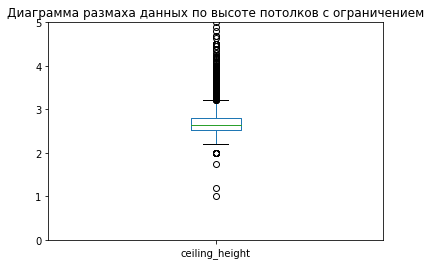

In [9]:
df['ceiling_height'].plot(kind='box', ylim=(0, 5), title='Диаграмма размаха данных по высоте потолков с ограничением');

Как видно из построенной диаграммы, большинство значений находися в районе *2.5 м*, 1 и 3 квартили нахдятся достаточно близко к медианному значению, выбросы отмечаются на высоте ниже *2.2 м* и выше *3.3 м*, что выглядит достаточно правдоподобно и позволяет предположить, что применение медианного зачения для заполнения пропусков не приведет к серьезному искажению данных. Однако, именно в данном случае, медианное значение может создать пик там, где его не должно было быть, в связи с чем тут вероятно логичнее использовать моду, которая новый пик не создаст, а лишь увеличит самый большой существующий, зная о чем, нам проще будет ориентироваться. Давайте посмотрим на эти значения.

In [10]:
print(*df['ceiling_height'].mode())
df['ceiling_height'].median()

2.5


2.65

Как мы видим, значения моды равно **2,5 м**, тогда как медиана равна **2,65 м**, таким образом применение медианы содало бы дополнительный пик на поседнем значении. Таким образом, заполним пропуски в столбце `'ceiling_height'` модой и убедимся в отсутствии пропусков в данном столбце (с учетом того, что метод `'mode()'` всегда возвращает тип *Series*, перед передачей его в соответствующие ячейки фейма следует привести его к числовому типу). 

In [11]:
df['ceiling_height'] = df['ceiling_height'].fillna(float(df['ceiling_height'].mode()))
df['ceiling_height'].isna().sum()

0

**Пропуски в столбце `'floors_total'` - количество этажей**

Рассмотрим количество пропусков в столбце `'floors_total'`.

In [12]:
df['floors_total'].isna().sum()

86

Гипотеза: Можно предположить, что в объявлениях могло не указываться общее количество этажей здания, в котором только один этаж. Как мы увидели ранее, в столбце `'floor'` пропусков не имеется. Тогда можно предположить, что если гипотеза верна, то в случаях, когда не указано общее количество этажей здания, в столбце `'floor'` будет указан этаж **1**. Для начала взглянем на несколько строчек таких объектов.

In [13]:
df.query('floors_total.isna()').head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
186,12,11640000.0,65.2,2018-10-02T00:00:00,2,2.5,NaN,30.80,4,NaN,False,False,12.00,NaN,Санкт-Петербург,39197.0,12373.0,1.0,123.0,0.0,NaN,49.0
237,4,2438033.0,28.1,2016-11-23T00:00:00,1,2.5,NaN,20.75,1,NaN,False,False,NaN,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,251.0
457,4,9788348.0,70.8,2015-08-01T00:00:00,2,2.5,NaN,38.40,12,NaN,False,False,10.63,0.0,Санкт-Петербург,37364.0,8322.0,2.0,309.0,2.0,706.0,727.0
671,4,6051191.0,93.6,2017-04-06T00:00:00,3,2.5,NaN,47.10,8,NaN,False,False,16.80,0.0,Санкт-Петербург,22041.0,17369.0,0.0,NaN,1.0,374.0,123.0
1757,5,3600000.0,39.0,2017-04-22T00:00:00,1,2.5,NaN,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,22735.0,11618.0,1.0,835.0,1.0,652.0,77.0


Как мы видим, сразу же гипотеза была опровергнута. Таким образом, предположить, каково общее количество этажей в каждом конкретном случае, невозможно. 
Однако, наличие таких пропусков в дальнейшем при категоризации данных по типу этажа будет восприниматься как аномалии, в связи с чем данные строки следует удалить.

In [14]:
df = df.dropna(subset=['floors_total'])

**Пропуски в столбце `'living_area'` - жилая площадь**

Рассмотрим количество пропусков в столбце `'living_area'`.

In [15]:
df['living_area'].isna().sum()

1870

Таким образом, в данных имеется некоторое количество пропусков (около 8%) в столбце, характеризующем жилую площадь. Оставление в такой ситуации данных пропусков будет выглядеть странным, поскольку речь идет о продаже объектов жилой недвижимости, в связи с чем наличие у таких объектов жилой площади подразумевается. Обратим внимание, что у нас имеется столбец **общая площадь**, в котором нет пропусков и который, по логике, должен коррелировать с **жилой площадью**. Рассчитаем коэффициент корреляции Пирсона для данных значений.

In [16]:
df['living_area'].corr(df['total_area'])

0.9397704889780097

Как мы видим, между данными столбцами имеется очень большая прямая зависимость, давайте рассмотрим ее на различных графиках.

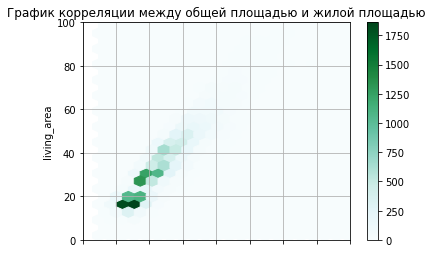

In [17]:
df.plot(kind='hexbin', x='total_area', y='living_area', xlim=(0, 200), ylim=(0, 100), grid=True,\
        title='График корреляции между общей площадью и жилой площадью');

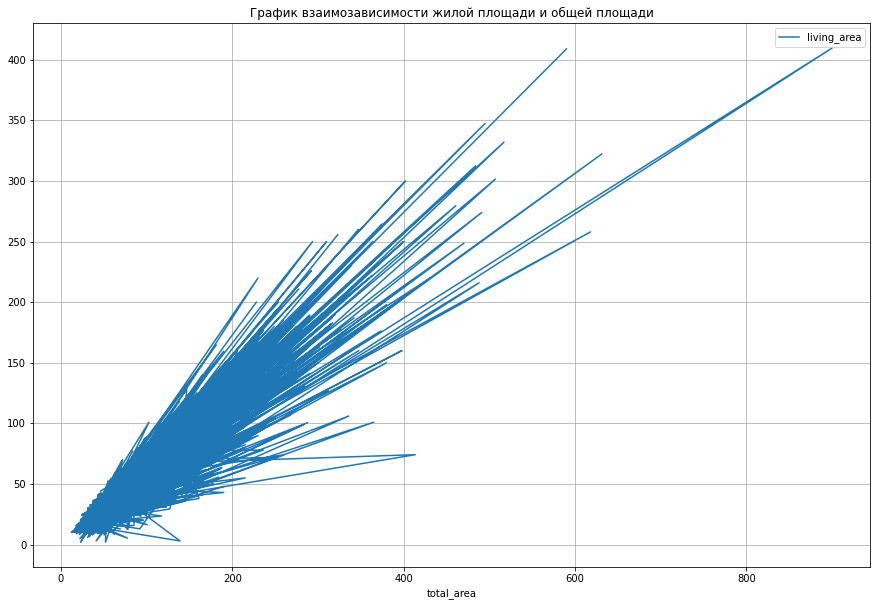

In [18]:
df.plot(kind='line', x='total_area', y='living_area', grid=True, figsize=(15, 10),\
        title='График взаимозависимости жилой площади и общей площади');

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


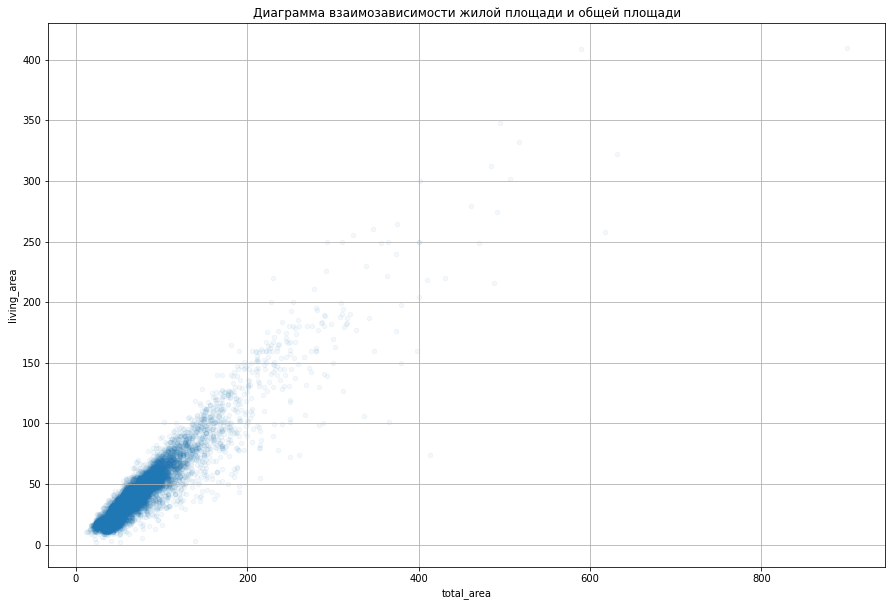

In [19]:
df.plot(kind='scatter', x='total_area', y='living_area', alpha=0.05, grid=True, figsize=(15, 10),\
        title='Диаграмма взаимозависимости жилой площади и общей площади');

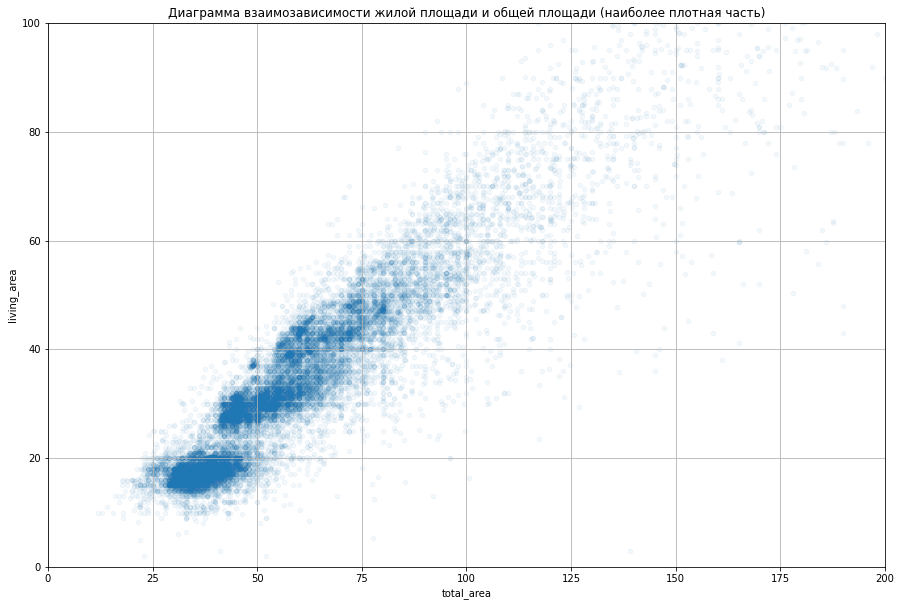

In [20]:
df.plot(kind='scatter', x='total_area', y='living_area', alpha=0.05, grid=True, xlim=(0, 200), ylim=(0, 100), figsize=(15, 10),\
        title='Диаграмма взаимозависимости жилой площади и общей площади (наиболее плотная часть)');

Как мы видим на вышеуказанной диаграмме, в целом наблюдается единая тенденция взаимозависимости значений *общей площади* и *живой площади*. 

В связи со значительным положительным коэффициентом корреляции Пирсона предлагаю запонить пропуски в столбце `'living_area'` с учетом значений колонки `'total_area'`, рассчитав среднее соотношение их медиан.

In [21]:
proc_median = df['living_area'].median() / df['total_area'].median()
df['living_area'] = df['living_area'].fillna(df['total_area'] * proc_median)
df['living_area'].isna().sum()

0

**Пропуски в столбце `'is_apartment'` - апартаменты**

Рассмотрим количество пропусков в столбце `'is_apartment'`.

In [22]:
df['is_apartment'].isna().sum()

20838

Как мы видим, в столбце `'is_apartment'` находится очень большое количество пропусков. В то же время каких-либо данных, позволяющих определить, относится ли продаваемый объект к аппартаментам или нет, в датафрейме не имеется. 

**Пропуски в столбце `'kitchen_area'` - площадь кухни**

Рассмотрим количество пропусков в столбце `'kitchen_area'`.

In [23]:
df['kitchen_area'].isna().sum()

2231

Таким образом, в данных имеется некоторое количество пропусков (около 10%) в столбце, характеризующем площадь кухни. Оставление в такой ситуации данных пропусков будет выглядеть странным, поскольку речь идет о продаже объектов жилой недвижимости, в связи с чем наличие у таких объектов кухни подразумевается установленными законодательством нормами и правилами для жилых помещений. Обратим внимание, что у нас имеется столбец **общая площадь**, в котором нет пропусков и который, по логике, должен коррелировать с **площадью кухни**. Рассчитаем коэффициент корреляции Пирсона для данных значений.

In [24]:
df['kitchen_area'].corr(df['total_area'])

0.6094677166170349

Как мы видим, между данными столбцами имеется взаимосвязь, хотя и не самая сильная. Давайте рассмотрим ее на различных графиках.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


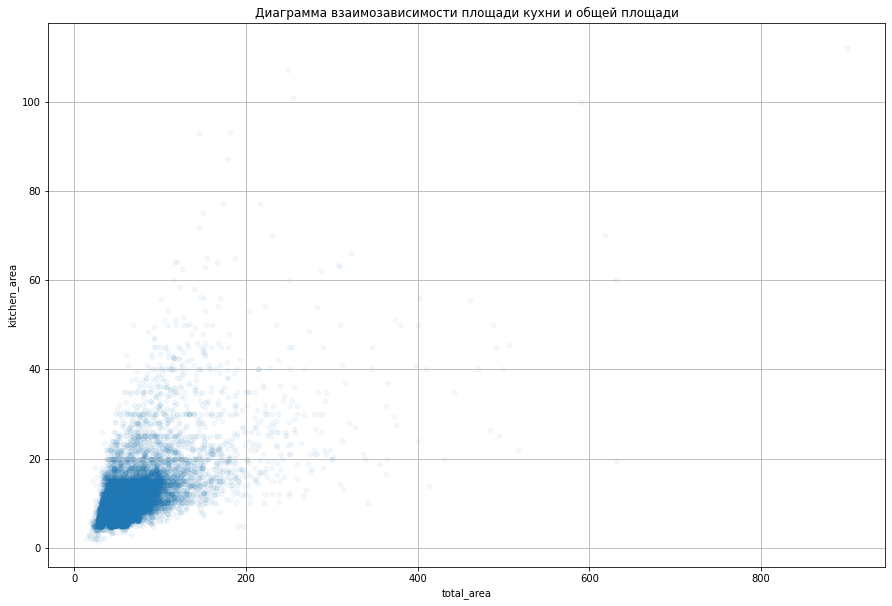

In [25]:
df.plot(kind='scatter', x='total_area', y='kitchen_area', alpha=0.05, grid=True, figsize=(15, 10),\
        title='Диаграмма взаимозависимости площади кухни и общей площади');

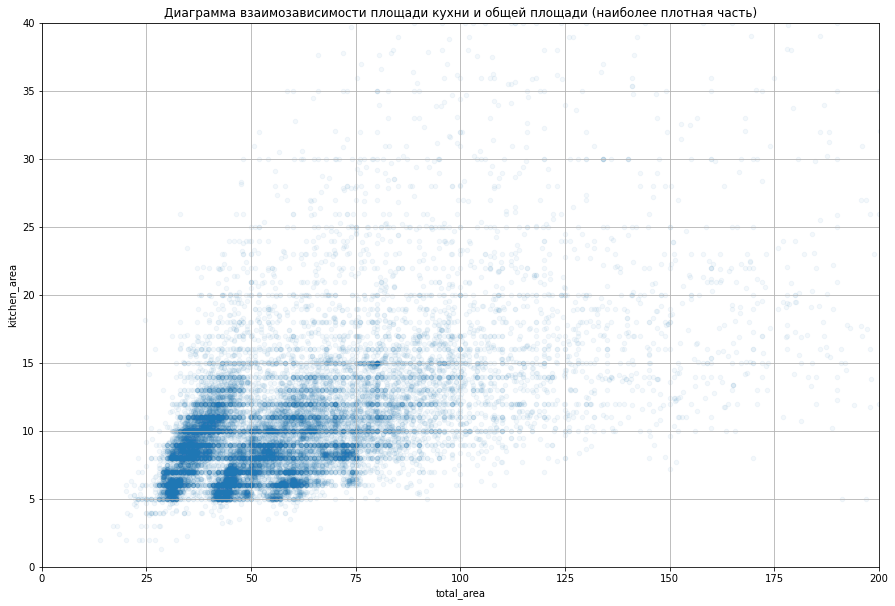

In [26]:
df.plot(kind='scatter', x='total_area', y='kitchen_area', alpha=0.05, xlim=(0, 200), ylim=(0, 40), grid=True, figsize=(15, 10),\
        title='Диаграмма взаимозависимости площади кухни и общей площади (наиболее плотная часть)');

Как мы видим на вышеуказанной диаграмме, в целом наблюдается тенденция зависимости значений *общей площади* и *площади кухни*. 

В связи с имеюимся положительным коэффициентом корреляции Пирсона предлагаю запонить пропуски в столбце `'kitchen_area'` за счет сведений в столбце `'total_area'` для чего категоризируем данные о квартирах по общей площади(сохраним в новый столбец `'decicle_area'`, который будет нам нужен лишь временно), для каждой такой категории найдем медианное значение площади кухни, которую будем присваивать на место пропусков в столбце `'kitchen_area'` в зависимости от принадежности к категории. После чего проверим, что все пропуски в данной колонке заменены. 

In [27]:
df['decicle_area'] = pd.qcut(df['total_area'], q=10)  # Создаем дополнительный столбец, категоризируя данные 
# по признаку размера общей площади с помощью метода qcut()
medians_kitchen_area = df.groupby('decicle_area')['kitchen_area'].transform('median') # Сохраняем в переменную сведения 
# о медианах площади кухни в зависимости от категории общей площади
df['kitchen_area'] = df['kitchen_area'].fillna(medians_kitchen_area)  # заменяем пропуски в колонке площади кухни
# соответствующими медианными значениями
df.drop(columns=['decicle_area'], axis=1, inplace=True)  # удаляем ненужный более временный столбец
df['kitchen_area'].isna().sum()  # проверяем на отсутствие пропусоков

0

**Пропуски в столбце `'balcony'` - количество балконов**

Рассмотрим количество пропусков в столбце `'balcony'`.

In [28]:
df['balcony'].isna().sum()

11480

Как известно, у квартиры балконы либо есть, либо их нет. Логично предположим, что в случае, если лицо, подавшее объявление, не указало количество балконов, значит их в квартире просто нет. В связи с этим логично будет заменить пропуски в данной колонке, числом **0**. И перепроверим на отсутствие пропусков.

In [29]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'].isna().sum()

0

**Пропуски в столбце `'locality_name'` - наименование населенного пункта**

Рассмотрим количество пропусков в столбце `'locality_name'`.

In [30]:
df['locality_name'].isna().sum()

48

Как мы видим, есть пропуски данных и в колонке, содержащей сведения о наименовании населенного пункта хоть их и крайне мало. В то же время у нас не имеется каких-либо данных, позволящих устранить данные пропуск, в том числе не имеется координат места нахождения объекта, с помощью которых мы могли бы устранить данные пробелы в сведениях за счет иных внешних источников. В связи с чем нам придется оставить данные пропуски, как они есть.

**Пропуски в столбце `'airports_nearest'` - расстояние до ближайшего аэропорта**

Рассмотрим количество пропусков в столбце `'airports_nearest'`.

In [31]:
df['airports_nearest'].isna().sum()

5532

В связи с тем, что в данной графе указывается значения расстояния до ближайшего аэропорта в метрах, логично предположить, что рядом с объектом, в данных указанного столбца которого имеется пропуск, просто нет поблизости аэропорта, который можно было бы указать. Заменить данный пропуск на что-либо просто бессмысленно, поэтому оставляем указанные пропуски как есть.

**Пропуски в столбце `'city_centers_nearest'` - расстояние до центра**

Рассмотрим количество пропусков в столбце `'city_centers_nearest'`.

In [32]:
df['city_centers_nearest'].isna().sum()

5509

Как мы видим, таких пропусков значителное количество (около 23%). В то же время у нас не имеется каких-либо данных, позволящих устранить данные пропуски, в том числе не имеется координат места нахождения объекта, с помощью которых мы могли бы устранить данные пробелы в сведениях за счет иных внешних источников, либо других данных, позволяющих каким-либо образом идентифицировать соотношение таких объектов с центром города. В связи с чем нам придется оставить данные пропуски, как они есть.

**Пропуски в столбце `'parks_around3000'` - колчество парков на расстоянии 3 км от дома**

Рассмотрим пропуски в столбце `'parks_around3000'`.

In [33]:
df['parks_around3000'].isna().sum()

5508

Логично будет предположить, что отсутствие указания на наличие парка в пределах 3 км, может означать, что парков на указанном расстоянии от объекта просто нет. С целью проверки гипотезы, давайте взглянем на то, отсутствуют ли сведения в столбце `'parks_nearest'` при отсутствии сведений в столбце`'parks_around3000'`. 

In [34]:
df.query('parks_around3000.isna() and parks_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.50,12.0,14.400000,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.50,27.0,15.430000,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.50,5.0,30.000000,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,NaN,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,NaN,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.50,9.0,18.923077,2,NaN,False,False,6.24,0.0,Коммунар,NaN,NaN,NaN,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,NaN,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.50,5.0,17.500000,4,NaN,False,False,6.00,0.0,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.000000,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,NaN,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3.0,29.700000,1,NaN,False,False,8.50,0.0,село Рождествено,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Как видим, во всех 5518 случаях отсутствия сведений в столбце `'parks_around3000'` в столбце `'parks_nearest'` также отсутствуют сведения. На основании чего полагаем, что гипотеза подтверждена и пропуски в столбце `'parks_around3000'` следует заполнить числом **0**. 

In [35]:
df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'].isna().sum()

0

**Пропуски в столбце `'parks_nearest'` - расстояние до парка**

Посмотрим количество пропусков в столбце `'parks_nearest'`.

In [36]:
df['parks_nearest'].isna().sum()

15568

В связи с тем, что в данной графе указывается значения расстояния до ближайшего парка в метрах, логично предположить, что рядом с объектом, в данных указанного столбца которого имеется пропуск, просто нет поблизости парка, который можно было бы указать. Заменить данный пропуск на что-либо просто бессмысленно, поэтому оставляем указанные пропуски как есть.

**Пропуски в столбце `'ponds_around3000'` - количество вдоемов на расстоянии 3 км от дома**

Взглянем на количество пропусков в столбце `'ponds_around3000'`.

In [37]:
df['ponds_around3000'].isna().sum()

5508

Логично будет предположить, что отсутствие указания на наличие водоёма в пределах 3 км, может означать, что водоёмов на указанном расстоянии от объекта просто нет. С целью проверки гипотезы, давайте взглянем на то, отсутствуют ли сведения в столбце `'ponds_nearest'` при отсутствии сведений в столбце`'ponds_around3000'`.

In [38]:
df.query('ponds_around3000.isna() and ponds_nearest.isna()')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.50,12.0,14.400000,5,NaN,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0.0,NaN,NaN,NaN,55.0
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.50,27.0,15.430000,26,NaN,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0.0,NaN,NaN,NaN,189.0
12,10,3890000.0,54.00,2016-06-30T00:00:00,2,2.50,5.0,30.000000,5,NaN,False,False,9.00,0.0,Сертолово,NaN,NaN,0.0,NaN,NaN,NaN,90.0
22,20,5000000.0,58.00,2017-04-24T00:00:00,2,2.75,25.0,30.000000,15,NaN,False,False,11.00,2.0,деревня Кудрово,NaN,NaN,0.0,NaN,NaN,NaN,60.0
30,12,2200000.0,32.80,2018-02-19T00:00:00,1,2.50,9.0,18.923077,2,NaN,False,False,6.24,0.0,Коммунар,NaN,NaN,0.0,NaN,NaN,NaN,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23683,16,2100000.0,62.80,2018-09-18T00:00:00,4,2.50,5.0,45.500000,3,NaN,False,False,5.50,0.0,посёлок Дзержинского,NaN,NaN,0.0,NaN,NaN,NaN,NaN
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.50,5.0,17.500000,4,NaN,False,False,6.00,0.0,Тихвин,NaN,NaN,0.0,NaN,NaN,NaN,413.0
23695,14,3100000.0,59.00,2018-01-15T00:00:00,3,2.50,5.0,38.000000,4,NaN,False,False,8.50,0.0,Тосно,NaN,NaN,0.0,NaN,NaN,NaN,45.0
23696,18,2500000.0,56.70,2018-02-11T00:00:00,2,2.50,3.0,29.700000,1,NaN,False,False,8.50,0.0,село Рождествено,NaN,NaN,0.0,NaN,NaN,NaN,NaN


Как видим, во всех 5518 случаях отсутствия сведений в столбце `'ponds_around3000'` в столбце `'ponds_nearest'` также отсутствуют сведения. На основании чего полагаем, что гипотеза подтверждена и пропуски в столбце `'ponds_around3000'` следует заполнить числом **0**. 

In [39]:
df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'].isna().sum()

0

**Пропуски в столбце `'ponds_nearest'` - расстояние до ближайшего водоема**

Взглянем на количество пропусков в столбце `'ponds_nearest'`.

In [40]:
df['ponds_nearest'].isna().sum()

14552

В связи с тем, что в данной графе указывается значения расстояния до ближайшего водоёма в метрах, логично предположить, что рядом с объектом, в данных указанного столбца которого имеется пропуск, просто нет поблизости водоёма, который можно было бы указать. Заменить данный пропуск на что-либо просто бессмысленно, поэтому оставляем указанные пропуски как есть.

**Пропуски в столбце `'days_exposition'` - количество дней, в течение которых было размещено объявление**

Взглянем на количество пропусков в столбце `'days_exposition'`.

In [41]:
df['days_exposition'].isna().sum()

3172

У нас имеется сведения о дате публикации объявления, однако ввиду отсутствия сведений о дате осуществления продажи объекта, получить сведения о том, чем можно заполнить пропуски в столбце `'days_exposition'`, невозможно, в связи с чем оставляем данные пропуски как есть. 

По итогам работы с пропусками взглянем на достигнутые результаты.

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23613 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23613 non-null  int64  
 1   last_price            23613 non-null  float64
 2   total_area            23613 non-null  float64
 3   first_day_exposition  23613 non-null  object 
 4   rooms                 23613 non-null  int64  
 5   ceiling_height        23613 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           23613 non-null  float64
 8   floor                 23613 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23613 non-null  bool   
 11  open_plan             23613 non-null  bool   
 12  kitchen_area          23613 non-null  float64
 13  balcony               23613 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

Таким образом, в результате проведенной работы с пропусками из 14 столбцов пропуски удалось заменить в 6 случаях, в 5 случаях заполнить пропуски не удалось *(общее количество этажей здания, апартаменты, наименование населенного пункта, расстояние до центра, количество дней, в течении которых было размещено объявление)*, а еще в 3 случаях установлено (в случаях расстояния до *ближайших аэропорта, парка и водоёма*), что пропуски значений в этих столбцах являются собственно необходимыми и тем самым содержат неободимые данные. 

#### Работа с типами данных

Для решения вопроса о необходимости обновления типа данных предлагаю вновь взглянуть на несколько строк фрейма данных.

In [43]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.000000,8,NaN,False,False,25.0,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,2.50,11.0,18.600000,1,NaN,False,False,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,2.50,5.0,34.300000,4,NaN,False,False,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,2.50,14.0,91.730769,9,NaN,False,False,16.0,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.000000,13,NaN,False,False,41.0,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Первым, что бросается в глаза это стобец `'first_day_exposition'`, которому логично пидать тип **datetime**, чтобы с ним было удобно работать далее, что мы и сделаем.

In [44]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

Кроме того, складывается ощущение, что время (в часах, минутах и секундах) в действительности не отражено, и везде указано *00:00:00*. Чтобы проверить гипотезу рассмотрим как распределено количество значений часов, минут и секунд данного столбца в датафрейме. 

In [45]:
df['hour'] = pd.DatetimeIndex(df['first_day_exposition']).hour
df['minute'] = pd.DatetimeIndex(df['first_day_exposition']).minute
df['second'] = pd.DatetimeIndex(df['first_day_exposition']).second

In [46]:
print(df['hour'].value_counts())
display(df['minute'].value_counts())
df['second'].value_counts()

0    23613
Name: hour, dtype: int64


0    23613
Name: minute, dtype: int64

0    23613
Name: second, dtype: int64

Как видим, предположение верно, в связи с чем понимаем, что значения часа, миунуты и секунды публикации объявления фактически в данных не отражены и соответсвтенно нулевые значения нам не нужны, в связи с чем округлим значения до дня (с учетом того, что значения времени нулевые, то можно использовать методы `.round()` или `.floor()`) и удалим ненужные столбцы.

In [47]:
df['first_day_exposition'] = df['first_day_exposition'].dt.round('1D')
df.drop(columns=['hour', 'minute', 'second'], axis=1, inplace=True)

Также очевидно, что значения столбцов `'floors_total'`, `'balcony'`, `'parks_around3000'`, `'ponds_around3000'`, `'days_exposition'` лучше перевести в тип **int**, поскольку там в принципе могут быть только целые числа. Серьезного для нас изменения это не даст, но, возможно, поможет сэкономить память. В то же время надо отметить, что в столбце `'day_exposition'` мы не смогли заменить пропуски и у нас там остаются значения *NaN*, что не даёт нам перевести тип данных. Так же и столбец `'is_apartment'` хотя по сути и содержит значения типа *bool*, но большое количество пропусков не даёт перевести их в буллев тип. А затем взглянем на фрейм после внесенных изменений.

In [48]:
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['floors_total'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000.0,40.4,2018-12-04,1,2.50,11,18.600000,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.50,5,34.300000,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.50,14,91.730769,9,NaN,False,False,16.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


In [49]:
df['last_price'] = df['last_price'].astype('int')
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.000000,8,NaN,False,False,25.0,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,NaN
1,7,3350000,40.4,2018-12-04,1,2.50,11,18.600000,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0
2,10,5196000,56.0,2015-08-20,2,2.50,5,34.300000,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0
3,0,64900000,159.0,2015-07-24,3,2.50,14,91.730769,9,NaN,False,False,16.0,0,Санкт-Петербург,28098.0,6800.0,2,84.0,3,234.0,424.0
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.000000,13,NaN,False,False,41.0,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121.0


#### Работа с дубликатами в наименованиях населенных пунктов

Сначала взглянем на количество уникальных названий населенных пунктов, потом посмотрим и сами названия.

In [50]:
len(df['locality_name'].sort_values().unique())

365

In [51]:
df['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Как видно в глаза сразу бросаются две проблемы, способствующие наличию дубликатов в наименовании населенного пункта, это использование в ряде случаев (но не всегда) буквы `ё`, а также наименования *поселок/поселок городского типа/городской поселок* (которые считаем синонимами). Будем полагать, что наименование населенного пункта без указания его типа будет являться названием города, а тип населенного пункта, такие как **деревня, поселок, садовое товарищество, село** являются разными населенными пунктами и вполне может существовать 2 различных населенных пункта, c названиями, например, `село Павлово` и `поселок Павлово` (о чем нам говорит и информация сети *Интернет*, согласно которой в Ленинградской области имеется два таких разных населенных пункта в разных районах Ленинградской области: село Павлово и поселок Павлово, который именуется как *поселок гороского типа*). Давайте это исправим.

In [52]:
df['locality_name_nodubl'] = df['locality_name'].str.lower()
df['locality_name_nodubl'] = df['locality_name_nodubl'].str.replace('ё', 'е')
df['locality_name_nodubl'] = df['locality_name_nodubl'].str.replace('поселок городского типа', 'поселок')
df['locality_name_nodubl'] = df['locality_name_nodubl'].str.replace('городской поселок', 'поселок')
print(len(df['locality_name_nodubl'].sort_values().unique()))
df['locality_name_nodubl'].sort_values().unique()

323


array(['бокситогорск', 'волосово', 'волхов', 'всеволожск', 'выборг',
       'высоцк', 'гатчина', 'деревня агалатово', 'деревня аро',
       'деревня батово', 'деревня бегуницы', 'деревня белогорка',
       'деревня большая вруда', 'деревня большая пустомержа',
       'деревня большие колпаны', 'деревня большое рейзино',
       'деревня большой сабск', 'деревня бор', 'деревня борисова грива',
       'деревня ваганово', 'деревня вартемяги', 'деревня вахнова кара',
       'деревня выскатка', 'деревня гарболово', 'деревня глинка',
       'деревня горбунки', 'деревня гостилицы', 'деревня заклинье',
       'деревня заневка', 'деревня зимитицы', 'деревня извара',
       'деревня иссад', 'деревня калитино', 'деревня кальтино',
       'деревня камышовка', 'деревня каськово', 'деревня келози',
       'деревня кипень', 'деревня кисельня', 'деревня колтуши',
       'деревня коркино', 'деревня котлы', 'деревня кривко',
       'деревня кудрово', 'деревня кузьмолово', 'деревня курковицы',
       'дер

Таким образом, мы сократили список уникальных значений на 42 за счет избавления от дубликатов и сохранили его в новый столбец `'locality_name_nodubl'`.

#### Работа с аномальными значениями

Предварительно определимся с терминами. В задании указано на редкие и выбивающиеся значения, а затем о них говорится как об аномалиях, что на мой взгляд не совсем верно и требует разъяснения понятий. В этом исследовании в данном контексте будут использоваться следующие термины:

аномалии - значения датафрейма, которых либо в принципе не может быть для соответствующих данных, либо они могут быть теоретически, но настолько отличаются от обычных данных, что фактически меняют предназначение объекта, чем делают такие значения крайне маловероятными (например, высота потолка **1 м** или **100 м**). Такие данные нельзя привести в достоверный вид и мы их будем удалять после их выявления;

артефакты - значения датафрейма, которые сильно выделяются из общей массы по причине какой-либо ошибки при сборе данных, которую удалось выяснить, что позволяет привести такие данные в надлежащий (правильный) вид (например, значительное количество данных о высоте потолков от 20 м до 40 м с достаточной долей вероятности образовались по причине их неправильной записи (с лишней цифрой **0**), в связи с чем их достаточно разделить на 10, чтобы вернуть в правильное состояние. Таким образом, такие данные после приведения их в надлежащий вид, должны стать обычными и удаления не требуют;

выбросы - значения датафрейма, которые сильно выдеяются из общей массы, однако в отличии от аномалий, могут быть в действительности, однако ввиду их значительного отличия от основных значений они, верятнее всего, формируются по иным закономерностям, что сильно ухудшают анализ и выявления таких закономерностей в основной массе значений (например, стоимость квариры при продаже 763000000 рублей, что конечно может быть на практике, однако относится к категории продаж элитной недвижимости, которая имеет свои закономерности). Такие данные также будем удалять, однако следует помнить, что эти сведения при необходимости в зависимости от целей исседования могут использоваться для исследования иных категорий объектов (в частности, указанный выше пример может быть использован для анализа закономерностей формирования цены при продаже элитной недвижимости). Для удаления выбросов, которые очевидно будем делать неоднократно, но по одному алгоритму, давайте сразу объявим общую функцию для этого.

In [53]:
def drop_outliers_df(df, column, scale=1.5):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    down_tail = q1 - scale * iqr
    up_tail = q3 + scale * iqr
    return df[(df[column] >= down_tail) & (df[column] <= up_tail)]

Как мы уже успели заметить, в количественных столбцах фрейма данных в ряде случаев имеются странные значения (например, высота потолков **1 м** или **100 м**, чего объективно в реальности не сказать, что не может быть, однако крайне маловероятно). Давайте взглянем еще раз на список стандартных значений, обращая внимание на минимальные и максимальные показатели, и определим, где подобные значения еще могут встречаться.  

In [54]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,20441.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.666659,10.673824,34.631561,5.877313,10.425990,0.593063,28788.008185,14185.084015,0.468810,490.554630,0.590480,518.209469,180.884839
std,5.681541,1.090172e+07,35.648988,1.078380,0.997117,6.597173,22.394364,4.873539,5.699982,0.960307,12626.209956,8614.132292,0.748489,341.336698,0.884436,277.887489,219.685543
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.173077,8.000000,11.900000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Как видно из столбца `'last_price'`, данные, отображаемые в нем в результате исполнения метода `'describe'`, представлены в экспоненциальной записи, то есть искаженном для обычного восприятия виде ввиду значительной длины числа. Чтобы взглянуть на данные этого столбца в привычном виде, можно перевести данные этой колонки в тысячи рублей, для чего разделим значения столбца на 1000 и результаты представим в новой колонке `'last_price_1000'.  

In [55]:
df['last_price_1000'] = df['last_price'] / 1000
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,23613.000000,2.361300e+04,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,23613.000000,18081.000000,18104.000000,23613.000000,8045.000000,23613.000000,9061.000000,20441.000000,23613.000000
mean,9.874518,6.540555e+06,60.340678,2.071147,2.666659,10.673824,34.631561,5.877313,10.425990,0.593063,28788.008185,14185.084015,0.468810,490.554630,0.590480,518.209469,180.884839,6540.555461
std,5.681541,1.090172e+07,35.648988,1.078380,0.997117,6.597173,22.394364,4.873539,5.699982,0.960307,12626.209956,8614.132292,0.748489,341.336698,0.884436,277.887489,219.685543,10901.722738
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000,12.190000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.500000,5.000000,19.000000,2.000000,7.000000,0.000000,18575.000000,9233.750000,0.000000,288.000000,0.000000,294.000000,45.000000,3400.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,26726.000000,13093.000000,0.000000,455.000000,0.000000,503.000000,95.000000,4650.000000
75%,14.000000,6.799000e+06,69.800000,3.000000,2.700000,16.000000,42.173077,8.000000,11.900000,1.000000,37242.000000,16287.000000,1.000000,612.000000,1.000000,730.000000,232.000000,6799.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,763000.000000


Из данных столбцов ряд из них для нас не представляет интереса в плане наличия аномалий (например, количество фотографий, этаж, расстояние до ближайших аэродромов парков и водоемов, и их количество в радиусе 3000 м), поскольку как видно уже из списка стандартных сведений, в данных столбцах информация распределена относительно равномерно. Кроме того, передача значений ряда колонок происходил автоматически (картографический вид данных), что в целом не мешает появиться в таких данных выбросам. На другие же значения стоит обратить большее внимание.

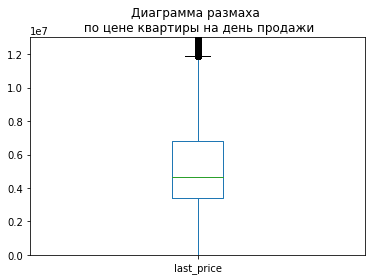

In [56]:
df['last_price'].plot(kind='box', title='Диаграмма размаха \n по цене квартиры на день продажи')
plt.ylim(0, 13000000);

В связи с тем, что за пределами выборки оказалось значительное количество сведений, предлагаем увеличить ее диапазон, передав в параметр *scale* нашей функции аргумент **3**. 

In [57]:
df = drop_outliers_df(df, 'last_price', 3)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,22646.000000,2.264600e+04,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,22646.000000,17139.000000,17155.000000,22646.000000,7367.000000,22646.000000,8378.000000,19752.000000,22646.000000
mean,9.770114,5.270294e+06,55.875355,1.992891,2.653918,10.750155,32.095625,5.880332,9.880132,0.594940,28852.170255,14585.475255,0.438709,492.202932,0.557184,526.729052,177.241849,5270.293751
std,5.599598,2.912672e+06,23.114955,0.965143,1.011688,6.641029,15.660890,4.894920,4.354185,0.954736,12826.113571,8574.049998,0.720345,337.397126,0.856068,277.383798,216.092348,2912.672309
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,208.000000,0.000000,1.000000,0.000000,13.000000,1.000000,12.190000
25%,6.000000,3.390000e+06,39.700000,1.000000,2.500000,5.000000,18.700000,2.000000,7.000000,0.000000,18363.000000,9968.000000,0.000000,290.000000,0.000000,306.000000,44.000000,3390.000000
50%,9.000000,4.500000e+06,50.700000,2.000000,2.500000,9.000000,30.000000,4.000000,9.000000,0.000000,26856.000000,13332.000000,0.000000,456.000000,0.000000,514.500000,93.000000,4500.000000
75%,14.000000,6.400000e+06,66.400000,3.000000,2.700000,16.000000,40.800000,8.000000,11.167500,1.000000,37434.000000,16505.000000,1.000000,614.000000,1.000000,737.000000,226.000000,6400.000000
max,50.000000,1.699000e+07,320.000000,10.000000,100.000000,60.000000,190.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


Мы избавились от выбросов и аномалий в столбце `'last_price'`.

Давайте взглянем на распределение значений по столбцу `'ceiling_height'`.

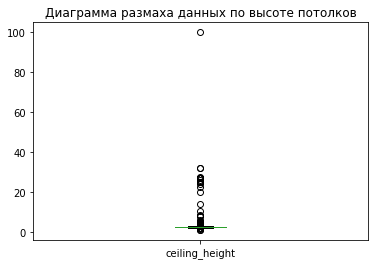

In [58]:
df['ceiling_height'].plot(kind='box', title='Диаграмма размаха данных по высоте потолков');

Как мы видим, помимо основной массы значений, имеется значительное количество значений, находящееся в промежутке от 20 до 40 м. Логично предположить, что здесь имеет место ошибка, связанная с указанием лишнего **0**. Давайте взглянем на них внимательнее.

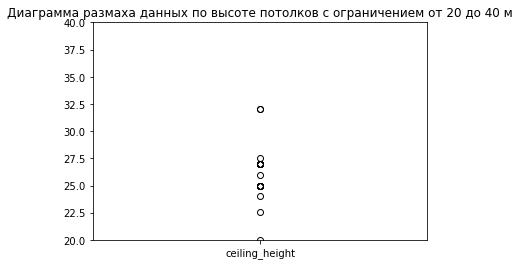

In [59]:
df['ceiling_height'].plot(kind='box', ylim=(20, 40), title='Диаграмма размаха данных по высоте \
потолков с ограничением от 20 до 40 м');

Как мы понимаем, значительное количество потолков имеют высоту от **2 м** до **3.3 м**. С учетом этого взникает пониманее того, что в данном случае как раз и имеет место наличие ошибки с лишним **0**. Исправим её, признав условно "нормальными" потолками высоту от 2 до 4 метров. 

In [60]:

'''
Я понимаю, что простое отключение выдаваемого в результате выполнения кода ниже предупеждения 
SettingWithCopyWarning не является решением возникшей проблемы.
По всякому пытался бороться с выскакивавшим тут предупреждением. Пытался путем создания копий
фрейма данных, с использованием deep=True и deep=False, в хабре пытался вычитать про работу с поверностными 
и глубокими копиями, про проблемы pandas в цепном индексировании, но так и не смог решить. Я так понимаю, что проблема 
предупреждения SettingWithCopyWarning достаточно распространена и далеко не все до конца понимают ее механизм. 
Если есть возмжность, прошу подсказать глубинные причины ее появления и способы решения данной проблемы. 
Я понимаю, что это предупреждение, а не ошибка, но все же хотелось бы без него, складывается ощущение об ущербности 
применения методов "where()" и "mask()" в pandas.
Заранее спасибо.
'''
#pd.set_option('mode.chained_assignment', None) этим способом я просто отключил вывод предупреждения 
#пандас. Коды, которые я так и не смог заставить работать без предупреждения, закомментированы ниже 
#df['ceiling_height'].where(~((df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 40)), df['ceiling_height'] / 10, inplace=True, errors='ignore')
#df['ceiling_height'] = df['ceiling_height'].mask((df['ceiling_height'] >= 20) & (df['ceiling_height'] <= 40), df['ceiling_height'] / 10, errors='ignore').copy()

df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] = df.loc[df['ceiling_height'] >= 20, 'ceiling_height'] / 10
# Решил в итоге через применение .loc с подсказки преподавателя по проекту. Но хочется понять, почему у меня тут
# не получается использовать where(), которую настойчиво предлагали в теории (на мой взгляд, кстати, метод mask() вылядит удобнее)

/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1676: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


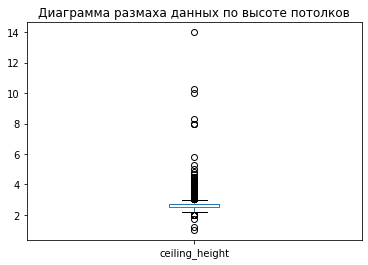

In [61]:
df['ceiling_height'].plot(kind='box', title='Диаграмма размаха данных по высоте потолков');

Как мы видим, имеется также значительное количество данных, вошедших в выбросы согласно алгоритму, заложенному в **boxplot**, однако на наш взгляд являющихся достаточно допустимыми (высоту потолков от 2 до 3,5 м полагаем нормальной и не являющейся выбросом). В связи с чем предлагаем при исключении выбросов расширить диапазон, передав в параметр *scale* нашей функции в качестве аргумента число **3** и отсечем выбросы. 

In [62]:
df = drop_outliers_df(df, 'ceiling_height', 3)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,22227.000000,2.222700e+04,22227.000000,22227.000000,22227.000000,22227.000000,22227.000000,22227.000000,22227.000000,22227.000000,16741.000000,16757.000000,22227.000000,7084.000000,22227.000000,8093.000000,19424.000000,22227.000000
mean,9.761371,5.193196e+06,55.289775,1.976155,2.606776,10.853467,31.692975,5.931120,9.818296,0.603455,28948.665492,14784.862505,0.425653,494.518492,0.543123,529.752873,176.026050,5193.195505
std,5.585362,2.841059e+06,22.367770,0.948872,0.170445,6.648554,15.063268,4.917485,4.291197,0.959141,12921.185780,8487.824906,0.707326,339.977439,0.842961,276.792068,214.634812,2841.059423
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,13.000000,1.000000,12.190000
25%,6.000000,3.350000e+06,39.400000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18140.000000,10364.000000,0.000000,293.000000,0.000000,313.000000,44.000000,3350.000000
50%,9.000000,4.500000e+06,50.000000,2.000000,2.500000,9.000000,29.770000,4.000000,9.000000,0.000000,27184.000000,13478.000000,0.000000,456.000000,0.000000,516.000000,93.000000,4500.000000
75%,14.000000,6.292500e+06,65.700000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000,37636.000000,16582.000000,1.000000,616.000000,1.000000,740.000000,224.000000,6292.500000
max,50.000000,1.699000e+07,320.000000,10.000000,3.300000,60.000000,190.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


Таким образом, мы отсекли как аномалии, так и выбросы, приведя данные в столбце `'ceiling_height'` в готовое для работы состояние, потеряв менее 300 строк данных из общего датафрейма.

Давайте вглянем на данные столбца `'rooms'`

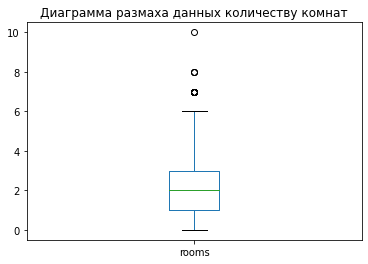

In [63]:
df['rooms'].plot(kind='box', title='Диаграмма размаха данных количеству комнат');

Судя по диаграмме, такой вариант будет вполне устраивать нас на предмет исключения выбросов, давайте их отсечем.

In [64]:
df = drop_outliers_df(df, 'rooms')
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,22211.000000,2.221100e+04,22211.000000,22211.000000,22211.000000,22211.000000,22211.000000,22211.000000,22211.000000,22211.000000,16725.000000,16741.000000,22211.000000,7071.000000,22211.000000,8085.000000,19413.000000,22211.000000
mean,9.762055,5.186446e+06,55.201834,1.972266,2.606656,10.857323,31.629286,5.932241,9.812956,0.603845,28951.980209,14793.059734,0.425015,494.580682,0.542839,529.749536,175.997785,5186.446197
std,5.584606,2.830335e+06,22.110251,0.937846,0.170233,6.648900,14.851845,4.918320,4.286217,0.959355,12924.617939,8485.711575,0.706688,340.202351,0.842639,276.789259,214.568741,2830.335043
min,0.000000,1.219000e+04,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,287.000000,0.000000,1.000000,0.000000,13.000000,1.000000,12.190000
25%,6.000000,3.350000e+06,39.400000,1.000000,2.500000,5.000000,18.600000,2.000000,7.000000,0.000000,18140.000000,10364.000000,0.000000,292.500000,0.000000,313.000000,44.000000,3350.000000
50%,9.000000,4.500000e+06,50.000000,2.000000,2.500000,9.000000,29.700000,4.000000,9.000000,0.000000,27219.000000,13481.000000,0.000000,456.000000,0.000000,516.000000,93.000000,4500.000000
75%,14.000000,6.285240e+06,65.600000,3.000000,2.700000,16.000000,40.000000,8.000000,11.000000,1.000000,37636.000000,16582.000000,1.000000,616.000000,1.000000,739.000000,224.000000,6285.240000
max,50.000000,1.699000e+07,320.000000,6.000000,3.300000,60.000000,190.000000,33.000000,100.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


Вариат до 6 комнат нас устраивает. В столбце `'rooms'` мы также видим имеются значения **0**, что казалось бы не должно быть, но у нас есть сведения о том, что среди продаваемых квартир есть с открытой планировкой и студии, может только такие квартиры обозначены как не имеющие комнат. Теперь проверим, так ли это или всё же мы имеем дело с  аномалией.    

In [65]:
df.query('rooms == 0 and not (studio or open_plan)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_nodubl,last_price_1000


In [66]:
df.query('rooms != 0 and (studio or open_plan)')

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_nodubl,last_price_1000
1379,3,6000000,44.20,2015-11-10,1,2.50,25,17.40,23,False,False,True,7.000,1,Санкт-Петербург,10663.0,12738.0,0,NaN,0,NaN,231.0,санкт-петербург,6000.0
2389,5,2250000,25.41,2016-06-07,1,2.50,12,17.08,8,False,True,False,6.240,2,Санкт-Петербург,14125.0,12921.0,2,328.0,2,485.0,26.0,санкт-петербург,2250.0
3187,13,3800000,27.00,2016-05-17,1,2.50,14,18.00,8,False,True,False,6.240,2,Санкт-Петербург,50348.0,16053.0,0,NaN,0,NaN,45.0,санкт-петербург,3800.0
4180,4,4500000,34.00,2016-04-25,1,2.80,10,21.00,10,False,True,False,8.965,2,Санкт-Петербург,23609.0,5299.0,0,NaN,1,433.0,62.0,санкт-петербург,4500.0
5668,9,3550000,36.70,2016-04-25,1,2.75,16,17.80,2,False,False,True,8.965,2,деревня Кудрово,NaN,NaN,0,NaN,0,NaN,61.0,деревня кудрово,3550.0
8683,10,3500000,32.50,2016-05-05,1,3.00,23,29.90,11,False,True,False,6.240,2,Санкт-Петербург,34967.0,14640.0,0,NaN,1,564.0,45.0,санкт-петербург,3500.0
8861,13,5500000,64.50,2015-11-13,3,3.00,5,48.00,2,False,False,True,9.200,0,Санкт-Петербург,20040.0,2621.0,2,205.0,2,204.0,229.0,санкт-петербург,5500.0
9063,6,3800000,39.00,2016-05-19,1,2.50,17,30.00,1,False,False,True,10.000,0,Санкт-Петербург,36721.0,13635.0,0,NaN,0,NaN,45.0,санкт-петербург,3800.0
11026,1,2800000,28.00,2016-05-04,1,2.50,26,19.00,6,False,True,False,6.240,2,посёлок Парголово,53511.0,19687.0,0,NaN,0,NaN,45.0,поселок парголово,2800.0
12760,0,3350000,51.00,2015-01-22,2,2.50,12,30.00,10,NaN,False,True,8.000,2,Коммунар,NaN,NaN,0,NaN,0,NaN,521.0,коммунар,3350.0


Как мы видим, объявлений о продаже квартир с **0** комнат, которые не являлись бы студиями или открытой планировки, не имеется. Значит в данном случае аномалий нет. В то же время имеется несколько квартир, обозначенных как студии или открытой планировки, в которых указано количество комнат (обычно **1**, но есть и указание на **2** и **3** комнаты, но с учетом сведений об общей площади таких квартир имеется понимание, что данные о комнатах указывались в таком случае в зависимости от соответствующей площади), что также не окажет существенного влияния на исследование. 

Далее взглянем на общую площадь квартир и посмотрим на их распределение. Затем отсечем выбросы.

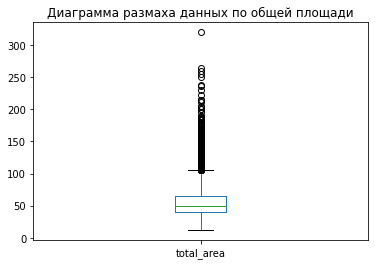

In [67]:
df['total_area'].plot(kind='box', title='Диаграмма размаха данных по общей площади');

In [68]:
df = drop_outliers_df(df, 'total_area')
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,21502.000000,2.150200e+04,21502.000000,21502.000000,21502.000000,21502.000000,21502.000000,21502.000000,21502.000000,21502.000000,16065.000000,16081.000000,21502.000000,6701.000000,21502.000000,7714.000000,18836.000000,21502.000000
mean,9.736536,4.960665e+06,52.859776,1.912799,2.601944,10.889824,30.228015,5.944424,9.555418,0.604130,28977.875444,14965.956781,0.414520,494.500522,0.531346,530.724527,172.410915,4960.664969
std,5.561837,2.524367e+06,17.677268,0.876588,0.164455,6.646971,12.411092,4.921941,3.814296,0.950531,12990.478945,8412.111927,0.698633,337.289757,0.832806,276.621815,210.439090,2524.367366
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,430.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.500000,5.000000,18.461538,2.000000,7.000000,0.000000,17974.000000,10650.000000,0.000000,293.000000,0.000000,315.000000,44.000000,3300.000000
50%,9.000000,4.400000e+06,49.300000,2.000000,2.500000,9.000000,29.000000,4.000000,9.000000,0.000000,27390.000000,13606.000000,0.000000,458.000000,0.000000,517.000000,91.000000,4400.000000
75%,14.000000,6.000000e+06,63.700000,3.000000,2.680000,16.000000,39.000000,8.000000,11.000000,1.000000,37781.000000,16670.000000,1.000000,617.000000,1.000000,738.750000,218.000000,6000.000000
max,50.000000,1.699000e+07,104.800000,6.000000,3.300000,60.000000,89.100006,33.000000,55.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


Вопрос с удалением выбросов в столбце `'total_area'` решен.

Далее взглянем на жилую площадь квартир и посмотрим на распределение по данном признаку. Затем отсечем выбросы.

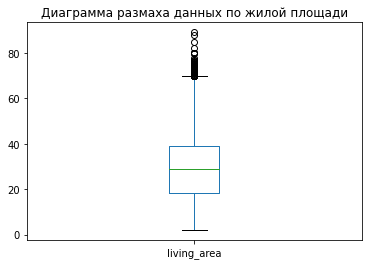

In [69]:
df['living_area'].plot(kind='box', title='Диаграмма размаха данных по жилой площади');

In [70]:
df = drop_outliers_df(df, 'living_area')
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,21435.000000,2.143500e+04,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,21435.000000,16004.000000,16020.000000,21435.000000,6665.000000,21435.000000,7675.000000,18783.000000,21435.000000
mean,9.732354,4.945522e+06,52.716825,1.906788,2.601264,10.903802,30.091708,5.953114,9.547366,0.604339,28989.717883,14989.876529,0.412923,494.595049,0.529928,530.955049,172.189054,4945.521834
std,5.559578,2.508811e+06,17.516658,0.870117,0.163582,6.648788,12.186077,4.926311,3.807588,0.950275,13004.405688,8402.084750,0.696645,337.795301,0.831731,276.570551,210.151536,2508.811447
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,430.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.500000,5.000000,18.400000,2.000000,7.000000,0.000000,17950.000000,10660.750000,0.000000,293.000000,0.000000,315.000000,44.000000,3300.000000
50%,9.000000,4.400000e+06,49.100000,2.000000,2.500000,9.000000,29.000000,4.000000,9.000000,0.000000,27428.000000,13615.500000,0.000000,458.000000,0.000000,517.000000,91.000000,4400.000000
75%,14.000000,6.000000e+06,63.300000,3.000000,2.670000,16.000000,39.000000,8.000000,11.000000,1.000000,37783.750000,16685.000000,1.000000,617.000000,1.000000,739.000000,218.000000,6000.000000
max,50.000000,1.699000e+07,104.800000,5.000000,3.300000,60.000000,69.800000,33.000000,55.700000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


В то же время мы видим наличие минимального значения *2 м*. Полагаем, что указание жилой площади менее 8 кв. м следует расценвать как аномалию. Уберем сроки с такими значениями.

In [71]:
df = df.loc[df['living_area'] >= 8]

После удаления выбросов и аномалий в столбце `'living_area'` аналогичным образом решим вопрос с такими данными в столбце `'kitchen_area'`.

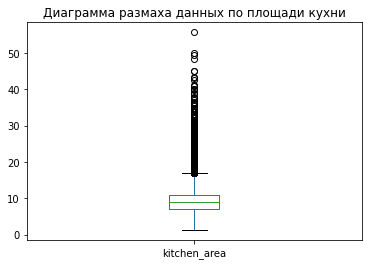

In [72]:
df['kitchen_area'].plot(kind='box', title='Диаграмма размаха данных по площади кухни');

В данном случае полагаем необходимым также увеличить площадь, которая не входит в выбросы, увеличив зачение *scale* до **4**. При этом полагаю необходимым удалить данные об объектах с площадью кухни менее 4 м.

In [73]:
df = drop_outliers_df(df, 'kitchen_area', 4)
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,21300.000000,2.130000e+04,21300.000000,21300.000000,21300.000000,21300.000000,21300.000000,21300.000000,21300.000000,21300.000000,15888.000000,15904.000000,21300.000000,6604.000000,21300.000000,7611.000000,18681.000000,21300.000000
mean,9.716573,4.916092e+06,52.558616,1.904977,2.600477,10.898404,30.085529,5.951784,9.410665,0.604648,28992.168744,15017.490443,0.411643,493.930648,0.528122,531.161608,172.066966,4916.091816
std,5.550006,2.472141e+06,17.394771,0.870498,0.162785,6.646409,12.177965,4.923593,3.352397,0.950034,13015.887845,8403.507045,0.695971,335.668659,0.830036,276.421542,209.989976,2472.141109
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,8.000000,1.000000,1.300000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,430.000000
25%,6.000000,3.300000e+06,39.000000,1.000000,2.500000,5.000000,18.400000,2.000000,7.000000,0.000000,17950.000000,10708.750000,0.000000,293.000000,0.000000,315.500000,44.000000,3300.000000
50%,9.000000,4.400000e+06,49.000000,2.000000,2.500000,9.000000,29.000000,4.000000,8.965000,0.000000,27425.000000,13635.000000,0.000000,458.000000,0.000000,517.000000,91.000000,4400.000000
75%,14.000000,5.990000e+06,63.000000,3.000000,2.660000,16.000000,39.000000,8.000000,11.000000,1.000000,37843.250000,16686.750000,1.000000,617.000000,1.000000,739.000000,218.000000,5990.000000
max,39.000000,1.699000e+07,104.800000,5.000000,3.300000,60.000000,69.800000,33.000000,27.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000,16990.000000


In [74]:
df = df.loc[df['kitchen_area'] >= 4]

In [75]:
df.shape

(21272, 24)

После всех манипуляций согласно таблице странным остается только наличие 5 балкнов в квартире, тогда как больше половины кварир балконов вообще не имеет. Давайте отсечем выбросы из столбца `'balcony'`.

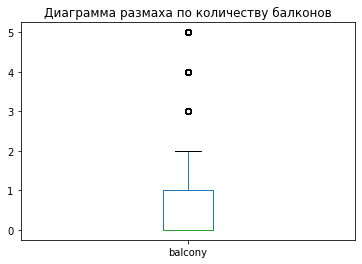

In [76]:
df['balcony'].plot(kind='box', title='Диаграмма размаха по количеству балконов');

In [77]:
df = drop_outliers_df(df, 'balcony')
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000
count,20815.000000,2.081500e+04,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,15521.000000,15537.000000,20815.000000,6446.000000,20815.000000,7440.000000,18283.000000,20815.000000
mean,9.689839,4.878274e+06,52.224951,1.892097,2.599416,10.861926,29.873265,5.921499,9.387224,0.521018,28971.746924,15006.890970,0.412251,493.178095,0.528801,531.025806,171.944265,4878.274176
std,5.541260,2.446225e+06,17.235676,0.868661,0.162387,6.643451,12.107786,4.909695,3.333142,0.764362,13026.401408,8422.743406,0.697890,336.597107,0.830918,276.073682,210.113389,2446.225301
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,8.000000,1.000000,4.000000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,430.000000
25%,6.000000,3.300000e+06,38.900000,1.000000,2.500000,5.000000,18.290000,2.000000,7.000000,0.000000,17942.000000,10666.000000,0.000000,292.000000,0.000000,316.750000,44.000000,3300.000000
50%,9.000000,4.350000e+06,48.400000,2.000000,2.500000,9.000000,29.000000,4.000000,8.965000,0.000000,27359.000000,13625.000000,0.000000,458.000000,0.000000,516.000000,91.000000,4350.000000
75%,14.000000,5.949000e+06,62.875000,3.000000,2.650000,16.000000,38.450000,8.000000,11.000000,1.000000,37793.000000,16689.000000,1.000000,614.750000,1.000000,736.250000,217.000000,5949.000000
max,39.000000,1.699000e+07,104.800000,5.000000,3.300000,60.000000,69.800000,33.000000,27.000000,2.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000,16990.000000


С учетом данных этой таблицы, полагаем фрейм данных очищенным от аномалий и выбросов, что позволяет нам продолжить исследование.

In [78]:
df.duplicated().sum()

0

**Вывод:** Мы осуществили предобработку данных:
- по возможности решили вопрос с заполнением пропусков либо признали, что данные пропуски в целом не окажут влияния на общие результаты (что не препятствует возможному их удалению в дальнейшем для решения конкретных задач);
- осуществили изменение типов данных в ряде стобцов, где это было необходимо, либо могло как-либо еще положительно сказаться на работе с датафеймом;
- избавились от неявных дубликатов в наименованиях населенных пунктов;
- очистили фрейм от "мусорных данных" (аномалии, выбросы, артефакты). 

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавление новых столбцов

В соответствии с условиями подготовки проекта необходимо рассчитать сведения о цене квадратного метра, года, месяца и дня недели публикации объявления, тип этажа и расстояние до центра населенного пункта, которые внести в дополнительные столбцы. 

Расчет цены квадратного метра (будем считать цену квадратного метра от общей площади) и сохранение даных в новом столбце.

In [79]:
df['price_square_meter'] = df['last_price'] / df['total_area']

Вычисление дня недели подачи объявления и сохранение данных в новом столбце.

In [80]:
df['first_exposition_weekday'] = df['first_day_exposition'].dt.weekday

Вычисление месяца подачи объявления и сохранение данных в новом столбце.

In [81]:
df['first_exposition_month'] = pd.DatetimeIndex(df['first_day_exposition']).month

Вычисление года подачи объявления и сохранение данных в новом столбце.

In [82]:
df['first_exposition_year'] = pd.DatetimeIndex(df['first_day_exposition']).year

Вычисление типа этажа (первый, последний, другие) и сохранение данных в новом столбце.

В данном случае необходимо решить вопрос с одноэтажными домами, в которых 1 этаж является одновременно первым и последним. Полагаем, что в данной категоризации мы присвоем таким квартирам категорию *первый*, но в дальнейшем при анализе влияния типа этажа на цену квартиры неплохо бы проверить, оказывают ли какое-либо воздействе в данном плане наличие одноэтажных домов, однако для решения данного вопроса в данном проекте выборка будет слишком мала. 

In [83]:
df['floor_type'] = 'другой'
df['floor_type'] = df['floor_type'].where(df['floor'] != df['floors_total'], 'последний')
df['floor_type'] = df['floor_type'].where(df['floor'] != 1, 'первый')

Вычисление расстояния до центра города в километрах и сохранение данных в новом столбце.

In [84]:
df['to_centers_kilometr'] = round(df['city_centers_nearest'] / 1000)

Теперь посмотрим на столбцы, которые мы создали.

In [85]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_nodubl,last_price_1000,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_type,to_centers_kilometr
1,7,3350000,40.4,2018-12-04,1,2.5,11,18.600000,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок шушары,3350.0,82920.792079,1,12,2018,первый,19.0
2,10,5196000,56.0,2015-08-20,2,2.5,5,34.300000,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,санкт-петербург,5196.0,92785.714286,3,8,2015,другой,14.0
5,10,2890000,30.4,2018-09-10,1,2.5,12,14.400000,5,NaN,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,поселок янино-1,2890.0,95065.789474,0,9,2018,другой,NaN
6,6,3700000,37.3,2017-11-02,1,2.5,26,10.600000,6,NaN,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,поселок парголово,3700.0,99195.710456,3,11,2017,другой,19.0
7,5,7915000,71.6,2019-04-18,2,2.5,24,41.307692,22,NaN,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,санкт-петербург,7915.0,110544.692737,3,4,2019,другой,12.0


**Вывод:** Мы осуществили расчеты цены квадратного метра, года, месяца и дня недели публикации объявления, типа этажа и расстояния до центра населенного пункта, сохранив все сведения в новых столбцах фрейма. Все указанные сведения нам помогут при решении задач 4 этапа проекта - исследовательского анаиза данных.

### Проведите исследовательский анализ данных

#### Изучение параметров ряда объектов

Теперь изучим объекты по следующим параметрам *общая площадь, жилая площадь, площадь кухни, цена объекта, количество комнат, высота потолков, этаж квартиры, тип этажа квартиры («первый», «последний», «другой»), общее количество этажей в доме, расстояние до центра города в метрах, расстояние до ближайшего аэропорта, расстояние до ближайшего парка, день и месяц публикации объявления*. Для этого построим гистаграммы по каждомe параметру, имеющему числовое значение.

**Исследование параметра *общая площадь*.**

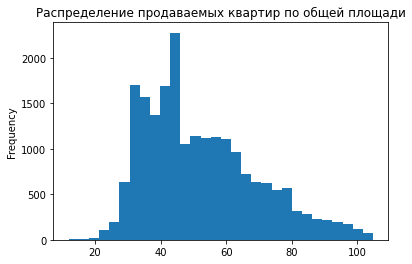

In [86]:
df['total_area'].plot(kind='hist', title='Распределение продаваемых квартир по общей площади', bins=30);

Гистограмма показывает в целом нормальное распределение, однако имеет явные пики в некоторых местах (в районах 40, 60, 80 м), что объясняется наличием типовых вариантов квартир. Причины наличия нескольких пиков попробуем узнать далее. Основная масса продаваемых квартир имеет общую площадь от **20 до 100 кв.м**. 

**Исследование параметра *жилая площадь*.**

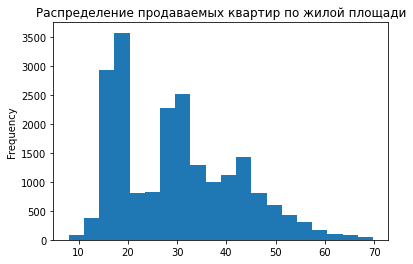

In [87]:
df['living_area'].plot(kind='hist', title='Распределение продаваемых квартир по жилой площади', bins=20);

Аналогично предыдущей данная гистограмма также показывает в целом нормальное распределение, однако имеет три явных пика, что может объясняться распространенностью типовых вариантов квартир. Жилая площадь основной части квартир имеет от **10 до 70 кв.м**.

**Исследование параметра *площадь кухни*.**

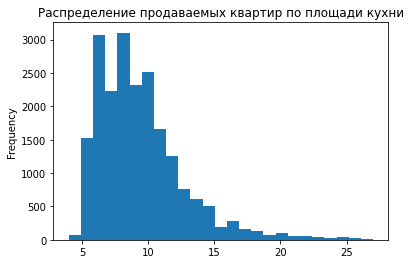

In [88]:
df['kitchen_area'].plot(kind='hist', title='Распределение продаваемых квартир по площади кухни', bins=25);

Аналогично двум предыдущим данная гистограмма также показывает в целом нормальное распределение с некоторым хвостом в сторону увеличения, однако также имеет несколько явных пиков, что может объясняться распространенностью типовых вариантов квартир. Основная часть квартир имеет площадь кухни от **5 кв.м** до **15 кв.м**, имеются также некоторое количество кухонь площадью до **27 кв.м**.

**Исследование параметра *цена объекта*.**

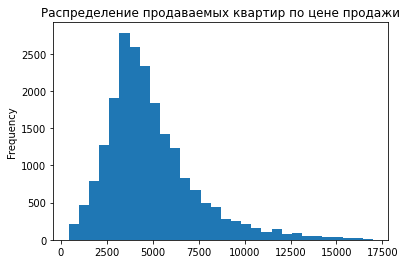

In [89]:
df['last_price_1000'].plot(kind='hist', title='Распределение продаваемых квартир по цене продажи', bins=30);

На данной гистограмме прослеживается нормальное распределение. Наибольшее количество квартир имеет цену в районе **4 млн. руб.**, основная масса распределена в районе от **1 млн. руб.** до **8,5 млн. руб.**

**Исследование параметра *количество комнат*.**

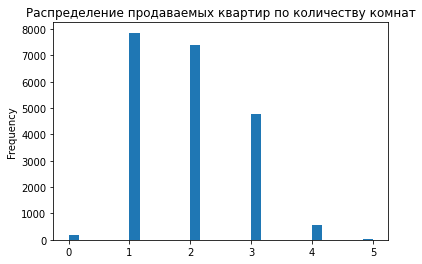

In [90]:
df['rooms'].plot(kind='hist', title='Распределение продаваемых квартир по количеству комнат', bins=30);

Вот мы и увидели наиболе вероятную причину наличия трех пиков на гистограммах распределения квартир по площадям. Очевидно, что имеются наболее типовые варианты планировки квартир в зависмости от количества комнат, в результате чего и просходило выделяление трех наиболее пиковых значений общей площади, жилой площади и площади кухни. Также следует помнить, что квартиры с количеством комнат **0** являются квартирами с открытой планировкой или студиями, объявлений о продаже которых, вероятно, слишком мало, что, возможно, связано с имевшимися недостатками при сборе данных. В основном продаются *1, 2 и 3-х комнатные квартиры*, наибольшее количество (почти **8000**) у однокомнатных квартир, двухкомнатных квартир около **7500**, техкомнатных квартир свыше **4500**, количество остальных квартир менее **1000**.   

**Исследование параметра *высота потолков*.**

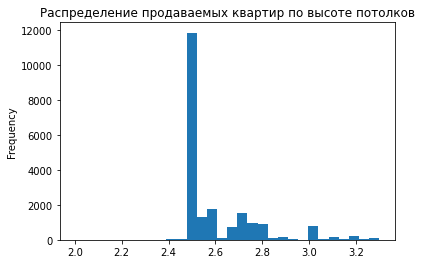

In [91]:
df['ceiling_height'].plot(kind='hist', title='Распределение продаваемых квартир по высоте потолков', bins=30);

Как видим из гистограммы, имеюся наиболее типичные нормы высоты потолка в **2,5 м**, **2,7 м**, **3 м**. Также мы помним, что значение **2.5 м** немного было искуственно увеличено за счет заполнения пропусков модой. 

**Исследование параметра *этаж квартиры*.**

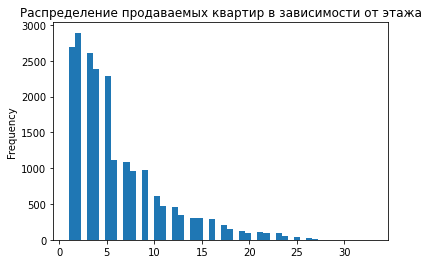

In [92]:
df['floor'].plot(kind='hist', title='Распределение продаваемых квартир в зависимости от этажа', bins=50);

Интересно, что на этой гистограмме видна тенденция к геометрическому распределению в соответствии с законом Бенфорда, в то же время имеются некоторые искажения, характеризующиеся более резким спадом после некоторых чисел (5, 9, 16), что очевидно объясняетя большим распространением количества домов типичной этажности (пятиэтажные, девятиэтажные, шестнадцатиэтажные дома). Значительная часть совокупности продаваемых квартир располагаются в пределах до **9 этажа**. 

**Исследование параметра *тип этажа квартиры («первый», «последний», «другой»)*.**

С учетом того, что в данной колонке у нас находится категориальные значения, имеет смысл строить не гистограмму распределения, а долевую диаграмму, на которой всё будет выглядеть нагляднее.

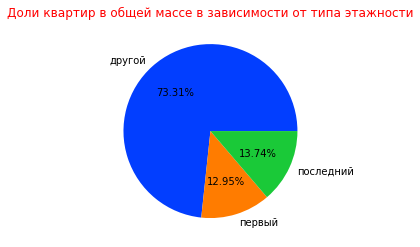

In [93]:
type_floorage_share = df.groupby('floor_type')['floor_type'].count() / df.shape[0]
name = df['floor_type'].sort_values().unique()
colors = sns.color_palette('bright')[0:6]
plt.title('Доли квартир в общей массе в зависимости от типа этажности', c='red')
plt.pie(type_floorage_share, labels=name, colors=colors, autopct='%.2f%%');

Как видим из полученной диаграммы, из общего количества продаваемых квартир **12,95 %** составляют квартиры, находящиеся на первом этаже, а около **13,74 %** квартиры, расположенные на последнем этаже.

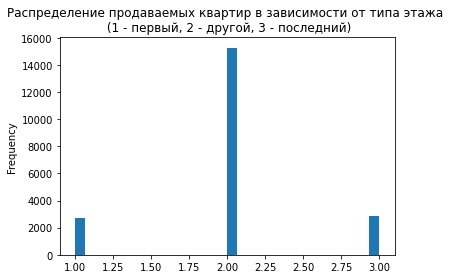

In [94]:
df['floor_type_num'] = df['floor_type'].replace(['первый', 'другой', 'последний'], [1, 2, 3])
df['floor_type_num'].plot(kind='hist', title='Распределение продаваемых квартир \
в зависимости от типа этажа \n (1 - первый, 2 - другой, 3 - последний)', bins=30);

**Исследование параметра *общее количество этажей в доме*.**

In [95]:
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_nodubl,last_price_1000,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,floor_type,to_centers_kilometr,floor_type_num
1,7,3350000,40.4,2018-12-04,1,2.5,11,18.600000,1,NaN,False,False,11.0,2,посёлок Шушары,12817.0,18603.0,0,NaN,0,NaN,81.0,поселок шушары,3350.0,82920.792079,1,12,2018,первый,19.0,1
2,10,5196000,56.0,2015-08-20,2,2.5,5,34.300000,4,NaN,False,False,8.3,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558.0,санкт-петербург,5196.0,92785.714286,3,8,2015,другой,14.0,2
5,10,2890000,30.4,2018-09-10,1,2.5,12,14.400000,5,NaN,False,False,9.1,0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,поселок янино-1,2890.0,95065.789474,0,9,2018,другой,NaN,2
6,6,3700000,37.3,2017-11-02,1,2.5,26,10.600000,6,NaN,False,False,14.4,1,посёлок Парголово,52996.0,19143.0,0,NaN,0,NaN,155.0,поселок парголово,3700.0,99195.710456,3,11,2017,другой,19.0,2
7,5,7915000,71.6,2019-04-18,2,2.5,24,41.307692,22,NaN,False,False,18.9,2,Санкт-Петербург,23982.0,11634.0,0,NaN,0,NaN,NaN,санкт-петербург,7915.0,110544.692737,3,4,2019,другой,12.0,2


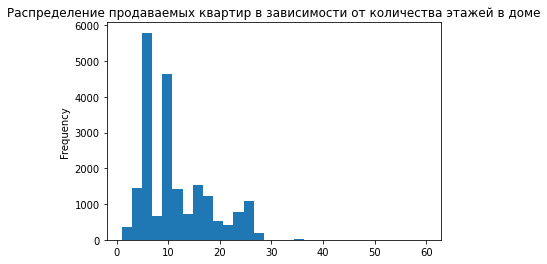

In [96]:
df['floors_total'].plot(kind='hist', title='Распределение продаваемых квартир \
в зависимости от количества этажей в доме', bins=30);

Как видим из гистограммы, в действительности имеется большое количество домов типичной этажности (**5, 9, 16, 18 и т.п.**).

**Исследование параметра *расстояние до центра города в метрах*.**

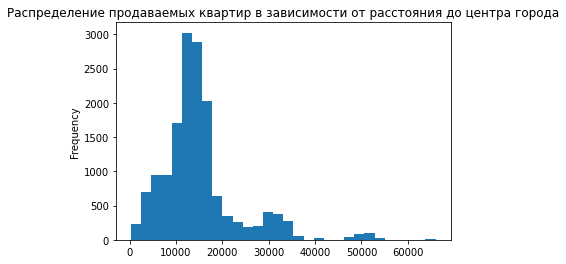

In [97]:
df['city_centers_nearest'].plot(kind='hist', title='Распределение продаваемых квартир \
в зависимости от расстояния до центра города', bins=30);

Понимание смысла этой гистограммы складывается следующм обазом. При увеличении радиуса от центра длина окружности увеличивается по формуле *2πr*, то есть с такой же прогрессией увеличивается и количество домов, находящися от центра на большем удалении, и так до конца границы города, который, разумеется, не бесконечен. Наличие небольших пиков в районе **30000 м** и **50000 м** объясняется особенностями какого-либо крупного города (городов), в данном случае, верояно, Санкт-Петербурга, в котором по мере расширения города на всё большем удалении от центра города строятся новые жилые комплексы, микрорайоны и районы. Основная масса продаваемых квартир находятся в пределах от **4 до 17 км** от центра города. 

**Исследование параметра *расстояние до ближайшего аэропорта*.**

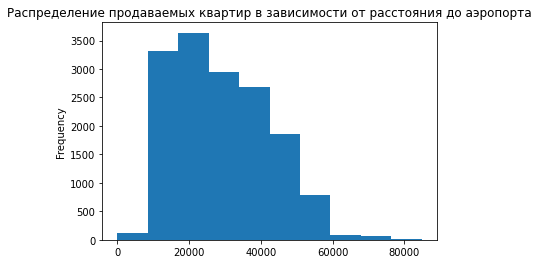

In [98]:
df['airports_nearest'].plot(kind='hist', title='Распределение продаваемых квартир \
в зависимости от расстояния до аэропорта', bins=10);

Похоже данная гистограмма показывает нам распределение Пуассона. Основная часть квартир располагается на расстоянии от **10 до 60 км** до ближайшего аэропорта. 

**Исследование параметра *расстояние до ближайшего парка*.**

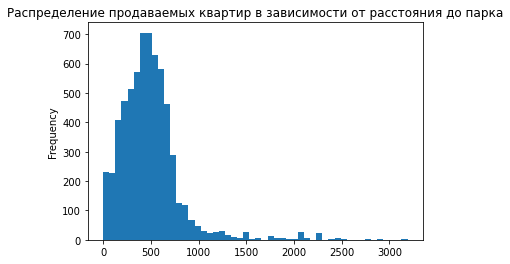

In [99]:
df['parks_nearest'].plot(kind='hist', title='Распределение продаваемых квартир в зависимости от расстояния до парка', bins=50);

На данной гистограмме также видно распределение Пуассона, если же отбросить правый хвост, который содержит статистически малые значения, то будет близка к нормальному распределению. В то же время возникает мысль, что большая часть квартир находися в пределах **1000 м** от парка, однако, как мы помним, про обрабтке данного столбца на наличие пропусков было достаточно большим, то есть более *60%*, что, вероятно, свидетельствует о том, что лицо, публиковавшее объявление, указывало данные сведения в случае, если парк находился недалеко от дома, в противном же случае предпочитая вовсе не указывать данные зачения. Зная, что в базе содержится два типа данных: добавленные пользователем и картографические, при этом расстояние до парка относится ко второму типу, преполагаем, что в таком случае пользователь не мог повлиять на сами данные (которые определялись автоматически), а мог лишь указать, должны ли данные сведения содержаться в объявлении либо нет. 

**Исследование параметра *день публикации объявления*.**

С учетом того, что всего 7 дней недели, логично указать в это число в параметре `bins`.

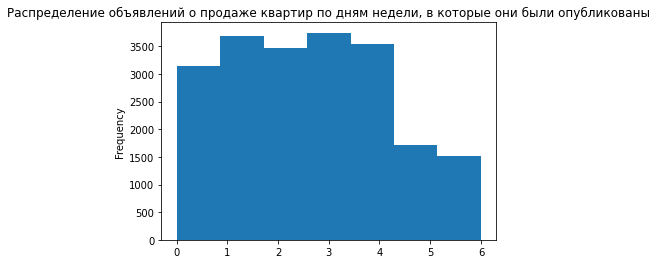

In [100]:
df['first_exposition_weekday'].plot(kind='hist', title='Распределение объявлений о продаже квартир \
по дням недели, в которые они были опубликованы', bins=7);

На гистограмме мы видим интересное распределение, указывающее что в будние дни объявлений публикуется больше всего с легкой тенденцией их увеличения от понедельника к пятнице, тогда как в выходные дни объявлений публикуется примерно в два раза меньше.

**Исследование параметра *месяц публикации объявления*.**

С учетом того, что всего в году 12 месяцев, логично указать в это число в параметре `bins`.

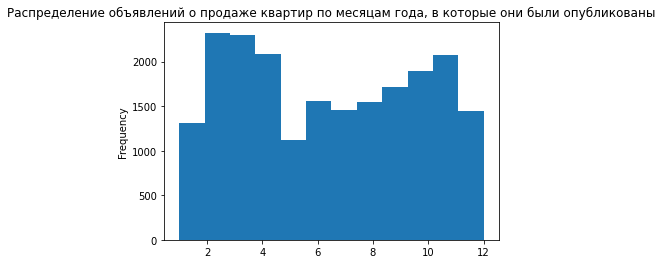

In [101]:
df['first_exposition_month'].plot(kind='hist', title='Распределение объявлений о продаже квартир \
по месяцам года, в которые они были опубликованы', bins=12);

Мы видим типичное распределение сезонности в публикации объявлений о продаже квартир, согласно которой пики таких публикаций в весенний и осенний периоды со спадом такой тенденции в декабре-январе, а также с мая по август.

#### Изучение времени, затрачиваемого на продажу квартиры

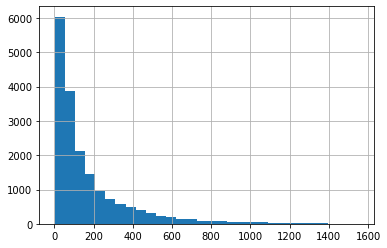

In [102]:
df['days_exposition'].hist(bins=30);

На данной гистограмме мы налюдаем типичное геометическое распределение. Давайте посмотрим на значения средней и медианы этих данных. 

In [103]:
df['days_exposition'].mean()

171.94426516436033

In [104]:
df['days_exposition'].median()

91.0

Как мы видим, среднее практически в 2 раза превышает медиану, поскольку на среднее значение сильно влияет длинный правый хвост, содеращий значения, которые можно было бы полагать за выбросы, что уводит среднее правее медианы. Давайте взлянем на это визуально.

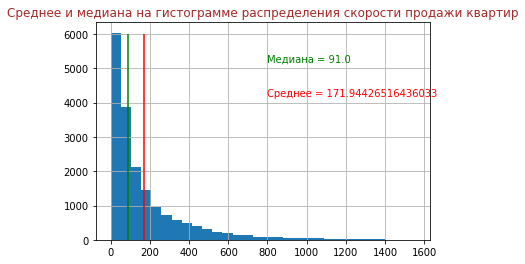

In [105]:
df['days_exposition'].hist(bins=30)
plt.vlines(x=df['days_exposition'].mean(), ymin=0, ymax=6000, colors='red')
plt.vlines(x=df['days_exposition'].median(), ymin=0, ymax=6000, colors='green')
plt.text(x=800, y=5200, s=f'Медиана = {df["days_exposition"].median()}', c='green')
plt.text(x=800, y=4200, s=f'Среднее = {df["days_exposition"].mean()}', c='red')
plt.title('Среднее и медиана на гистограмме распределения скорости продажи квартир', c='brown')
plt.show;

Таким образом, в среднем, обычный пользователь потратит примерно 91 день на продажу квартиры. Чтобы определить, какие продажи можно считать очень быстрыми, а какие необычайно долгими, следует определить оценочные понятия *быстро* и *долго* и решить, какое именно сроки под них подходят, для чего нет единой универсальной формулы и в различных случаях можно определять эти границы по разному. Один из таких способов применение метода `boxplot()`, который по сути с учетом поданных в него значений определяет границы нормы, за пределами которых уже находятся аномалии (границы устанавливаются на расстоянии полтора межквартильного размаха от первой и третей квартили). При этом отметим, что данные значения в самом методе `boxplot` изменить нельзя, но можно создать свой вариант определения таких границ (что мы делали в ряде случаев выше при работе с выбросами в данных), также можно менять условия только для одной стороны, делая условия определения границ разными в отношении минимума и максимума. В настоящее время давайте для определения очень быстрого и слишком долгого времени используем ранее написанную функцию `drop_outliers_df` (при этом можно поиграть с условиями опредения границ просто в данной функции меняя зачение параметра *scale*, который по умолчанию установлен в размере **1,5**, что мы и сделаем для определения быстрой продажи квартиры).

In [106]:
print('Будем считать квартиру проданной очень быстро, если на ее продажу было \
затрачено не более', (int(drop_outliers_df(df, 'days_exposition', scale=0.2)['days_exposition'].min())), 'суток.')
# параметр scale было решено определить в размере 0.2, поскольку при таком значении минимальное количество суток,
# за которые произойдет продажа с 1 до 10 дней.
print('Будем считать продажу квартиры слишком долгой, если на ее продажу было \
затрачено не менее', (int(drop_outliers_df(df, 'days_exposition')['days_exposition'].max())), 'суток.')

Будем считать квартиру проданной очень быстро, если на ее продажу было затрачено не более 10 суток.
Будем считать продажу квартиры слишком долгой, если на ее продажу было затрачено не менее 476 суток.


В то же время значительное количество продаж, осуществляемых в первые сутки после публикации объявления, может вызывать вопросы о причинах таких показателей. Ввиду отсутствия достаточных данных (о том, каким образом формируется понимание того, что квартира продана, обновляется ли время публикации объявления в случае внесения каких-либо изменений в ранее опубликованное объявление, учитывается ли квартира как "проданная" в случае, если объявление о продаже квартиры снято по причине того, что владелец передумал ее продавать и ряда других) в рамках данного исследования достоверно предложить причины такой ситуации не представляется возможным. 

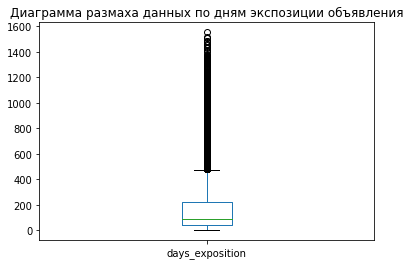

In [107]:
df['days_exposition'].plot(kind='box', title='Диаграмма размаха данных по дням экспозиции объявления');

In [108]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,last_price_1000,price_square_meter,first_exposition_weekday,first_exposition_month,first_exposition_year,to_centers_kilometr,floor_type_num
count,20815.000000,2.081500e+04,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,15521.000000,15537.000000,20815.000000,6446.000000,20815.000000,7440.000000,18283.000000,20815.000000,20815.000000,20815.000000,20815.000000,20815.000000,15537.000000,20815.000000
mean,9.689839,4.878274e+06,52.224951,1.892097,2.599416,10.861926,29.873265,5.921499,9.387224,0.521018,28971.746924,15006.890970,0.412251,493.178095,0.528801,531.025806,171.944265,4878.274176,93328.559214,2.579150,6.397310,2017.388326,15.002188,2.007831
std,5.541260,2.446225e+06,17.235676,0.868661,0.162387,6.643451,12.107786,4.909695,3.333142,0.764362,13026.401408,8422.743406,0.697890,336.597107,0.830918,276.073682,210.113389,2446.225301,31468.515049,1.792886,3.492392,1.019559,8.426852,0.516552
min,0.000000,4.300000e+05,12.000000,0.000000,2.000000,1.000000,8.000000,1.000000,4.000000,0.000000,0.000000,329.000000,0.000000,1.000000,0.000000,13.000000,1.000000,430.000000,7962.962963,0.000000,1.000000,2014.000000,0.000000,1.000000
25%,6.000000,3.300000e+06,38.900000,1.000000,2.500000,5.000000,18.290000,2.000000,7.000000,0.000000,17942.000000,10666.000000,0.000000,292.000000,0.000000,316.750000,44.000000,3300.000000,75000.000000,1.000000,3.000000,2017.000000,11.000000,2.000000
50%,9.000000,4.350000e+06,48.400000,2.000000,2.500000,9.000000,29.000000,4.000000,8.965000,0.000000,27359.000000,13625.000000,0.000000,458.000000,0.000000,516.000000,91.000000,4350.000000,93220.338983,3.000000,6.000000,2017.000000,14.000000,2.000000
75%,14.000000,5.949000e+06,62.875000,3.000000,2.650000,16.000000,38.450000,8.000000,11.000000,1.000000,37793.000000,16689.000000,1.000000,614.750000,1.000000,736.250000,217.000000,5949.000000,110560.031158,4.000000,10.000000,2018.000000,17.000000,2.000000
max,39.000000,1.699000e+07,104.800000,5.000000,3.300000,60.000000,69.800000,33.000000,27.000000,2.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1553.000000,16990.000000,387096.774194,6.000000,12.000000,2019.000000,66.000000,3.000000


In [109]:
q1 = df['days_exposition'].quantile(0.25)
q3 = df['days_exposition'].quantile(0.75)
iqr = q3 - q1
down_tail = q1 - 1.5 * iqr
up_tail = q3 + 1.5 * iqr
print(down_tail, up_tail)

-215.5 476.5


#### Изучение факторов, влияющих на общую (полную) стоимость объекта

Давайте определим, насколько влияют на размер общей (полной) стоимости квартиры (данные о которой мы будем брать из столбца `'last_price_1000'` для более понятного оформления графиков, в которых стоимость квартиры указана в тысячах рублей) значения её общей площади, жилой площади, площади кухни, количества комнат, этажа расположения квартиры (первый, последний, другой), даты публикации объявления (день недели, месяц, год). Давайте рассчитаем коэффициент корреляции стоимости и столбцов с числовыми значениями.

Для начала переведем позиции значений типа этажа в числовой формат для возможности работы с ним некоторыми методами.

In [110]:
df['floor_type_num'] = df['floor_type'].replace(['первый', 'другой', 'последний'], [1, 2, 3])

In [111]:
short_list = ['total_area', 'living_area', 'kitchen_area', 'rooms', 'floor_type_num',
              'first_exposition_weekday', 'first_exposition_month', 'first_exposition_year']
for name in short_list:
    print(f'Коэффициент корреляции стоимости квартиры от значения столбца {name} составляет: {df["last_price_1000"].corr(df[name])}')  

Коэффициент корреляции стоимости квартиры от значения столбца total_area составляет: 0.6939346078401123
Коэффициент корреляции стоимости квартиры от значения столбца living_area составляет: 0.5607754132335092
Коэффициент корреляции стоимости квартиры от значения столбца kitchen_area составляет: 0.5125168082957824
Коэффициент корреляции стоимости квартиры от значения столбца rooms составляет: 0.4060274406741895
Коэффициент корреляции стоимости квартиры от значения столбца floor_type_num составляет: 0.037484041529823105
Коэффициент корреляции стоимости квартиры от значения столбца first_exposition_weekday составляет: -0.012373402800845226
Коэффициент корреляции стоимости квартиры от значения столбца first_exposition_month составляет: 0.0021484313933124942
Коэффициент корреляции стоимости квартиры от значения столбца first_exposition_year составляет: 0.00781619575056182


Как видим наибольший коэффициент корреляции Пирсона между стоимостью квартиры и ее общей площадью. Также прослеживается значительный коэффициент корреляции цены с жилой площадью, площадью кухни, количеством комнат. Линейная зависимость цены от типа этажа, дня недели, месяца и года небольшая.  

Поскольку указанные в столбцах значения имеют как количественный так и категориальный характер, то работать с ними лучше различными методами. В связи с этим построим графики зависимости цены от количественных параметров.

/opt/conda/lib/python3.9/site-packages/pandas/plotting/_matplotlib/core.py:1041: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


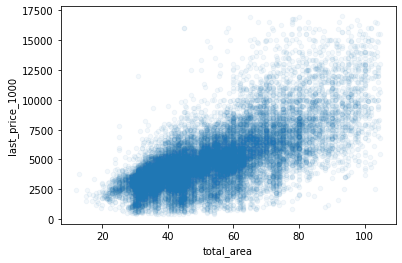

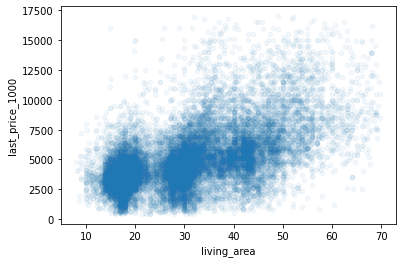

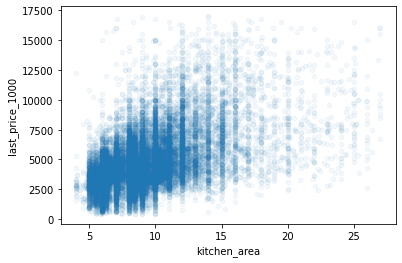

In [112]:
short_list = ['total_area', 'living_area', 'kitchen_area']
for name in short_list:
    df.plot(kind='scatter', y='last_price_1000', x=name, alpha=0.05);

Далее взглянем на соотношение интересующих значений, при этом будем использовать медиану и среднее показателя, которые будем сравнивать с ценой. Кроме того, для количественных показателей будем использовать обычный график, а для категориальных - столбчатый.

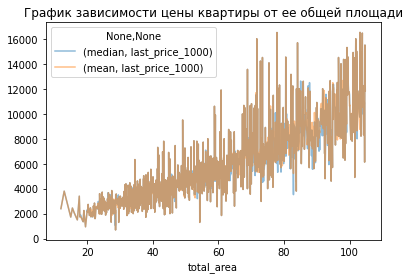

In [113]:
pivot_total_area = df.pivot_table(index='total_area', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_total_area.plot(title='График зависимости цены квартиры от ее общей площади', alpha=0.5);

Как видно на графике, стоимость квартиры существенно зависит от ее общей площади, если не обращать внимание на скачки значений, связанные, вероятно, с другими созависимыми показателями, то общая тенденция представляет собой практически прямую линию. 

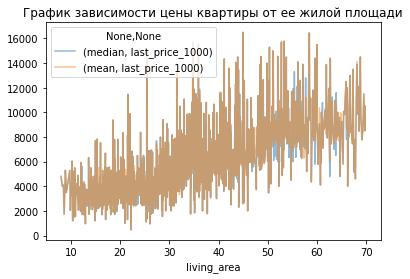

In [114]:
pivot_living_area = df.pivot_table(index='living_area', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_living_area.plot(title='График зависимости цены квартиры от ее жилой площади', alpha=0.5);

Как видно на графике, стоимость квартиры также зависит от ее жилой площади, хотя и менее выражено, чем от общей площади. 

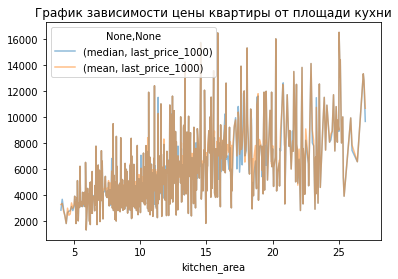

In [115]:
pivot_kitchen_area = df.pivot_table(index='kitchen_area', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_kitchen_area.plot(title='График зависимости цены квартиры от площади кухни', alpha=0.5);

Как видно на графике, стоимость квартиры также имеет зависимость от площади кухни, однако данная зависимость уже менее выражена, чем предыдущие показатели. Очевидно наличие взаимозависимости между показателями общей площади, жилой площади и площади кухни, при этом предполагаем, что общая площадь в данном случае выступает первичным показателем. 

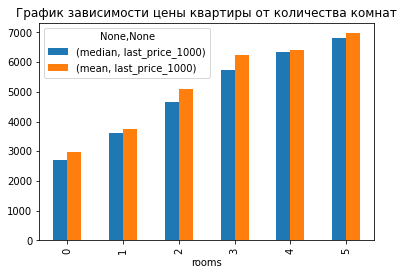

In [116]:
pivot_rooms = df.pivot_table(index='rooms', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_rooms.plot.bar(title='График зависимости цены квартиры от количества комнат');

Как видно и графика, имеется тенднция зависимости цены квартиры от количества комнат, но полагается, что основной здесь остается общая площадь, поскольку с увеличением количества комнат растет и общая площадь. Также на графике видно пониженная относительно других стоимость студий и квартир открытой планировки (**0** комнат).

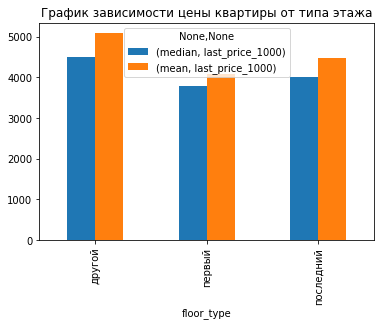

In [117]:
pivot_floor_type = df.pivot_table(index='floor_type', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_floor_type.plot.bar(title='График зависимости цены квартиры от типа этажа');

Как мы видим, на стоимость квартиры действительно влияет тип этажа продаваемой квартиры, так как видно, что квартиры на последнем этаже стоят чуть дороже квартир на 1 этаже, но существенно дешевле других квартир. В то же время коэффициент корреляции Пирсона показал фактически близкое к нулу значение, что может говорить о том, что зависимость в данном случае не линейного типа. 

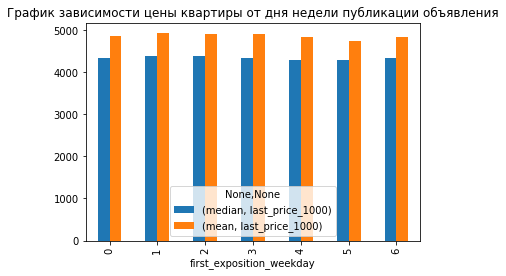

In [118]:
pivot_first_exposition_weekday = df.pivot_table(index='first_exposition_weekday', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_first_exposition_weekday.plot.bar(title='График зависимости цены квартиры от дня недели публикации объявления');

По всей видимости в данном случае какой-либо существенной зависимости цены от дня публикации объявления не имеется, что подтверждает фактически нулевой показатель коэффициента корреляции Пирсона. При этом незначительные колебания могут быть объяснены циклическим характером деловой активности людей в течение недели. 

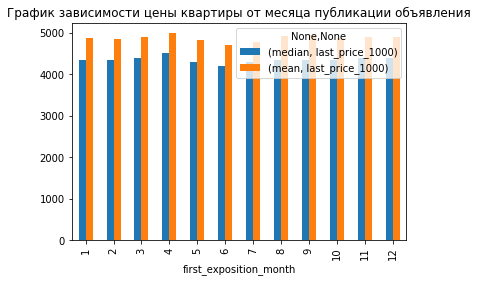

In [119]:
pivot_first_exposition_month = df.pivot_table(index='first_exposition_month', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_first_exposition_month.plot.bar(title='График зависимости цены квартиры от месяца публикации объявления');

Несмотря на практически нулевой коэффициет корреляции Пирсона на графике наблюдаются заметные колебания средних и медианных значений в зависимости от месяца подачи объявления (рост цены в весенние и осеннее время и спад в летний период). Данный факт очевидно характеризуется сезонными колебаниями цены на рынке недвижимости, поскольку в летний период спрос несколько падает, поскольку многие находятся в отпусках, а в зимний период имеются новогодние праздники и в целом отвлекающим фактором может выступать финансовое окончание года.  

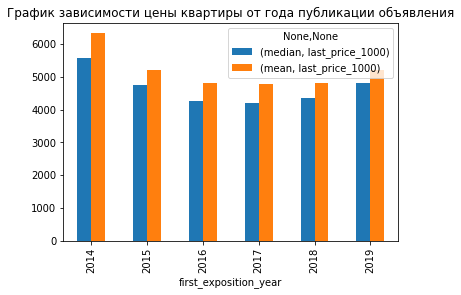

In [120]:
pivot_first_exposition_year = df.pivot_table(index='first_exposition_year', values='last_price_1000', aggfunc=['median', 'mean'])
pivot_first_exposition_year.plot.bar(title='График зависимости цены квартиры от года публикации объявления');

Как мы видим в условиях почти нулевого показателя коэффициента корреляции Пирсона из графика все же следует существенные изменения цен на жилую недвижимость в зависимости от года подачи объявления. Вероятно, это обусловлено общими экономическими изменениями в стране (инфляция, учетная ставка рефинансирования ЦБ РФ, которая прямо влияет на процентную ставку по ипотечным кредитам, выдаваемым банками гражданам и т.п.).  

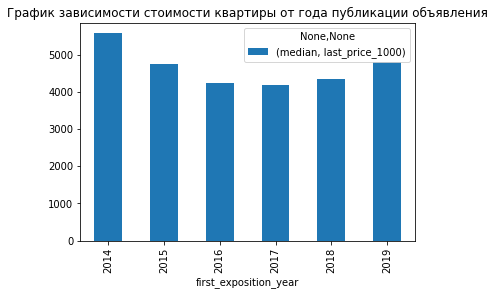

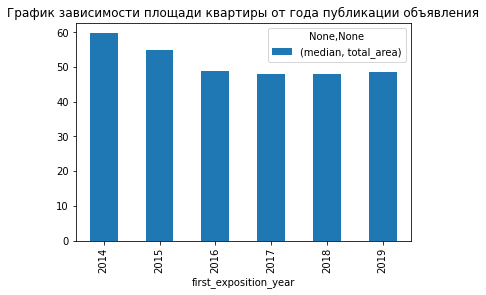

In [121]:
pivot_first_exposition_year = df.pivot_table(index='first_exposition_year', values='last_price_1000', aggfunc=['median'])
pivot_area_in_year = df.pivot_table(index='first_exposition_year', values='total_area', aggfunc=['median'])
pivot_first_exposition_year.plot.bar(title='График зависимости стоимости квартиры от года публикации объявления');
pivot_area_in_year.plot.bar(title='График зависимости площади квартиры от года публикации объявления');

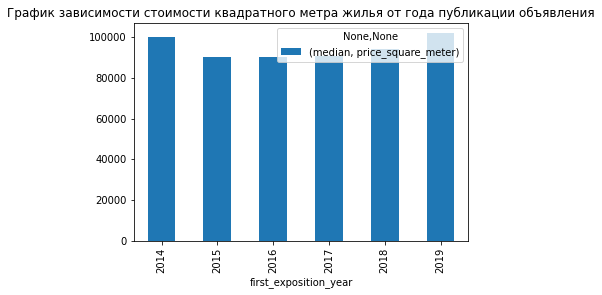

In [122]:
pivot_price_square_meter_year = df.pivot_table(index='first_exposition_year', values='price_square_meter', aggfunc=['median'])
pivot_price_square_meter_year.plot.bar(title='График зависимости стоимости квадратного метра жилья от года публикации объявления');

#### Расчет средней цены квадратного метра в 10 населенных пуктах с наибольшим числом объявлений

Посмотрим по выборке в каких населенных пунктах имеется наибольшее количество объявлений о продаже квартир.

In [123]:
df['locality_name_nodubl'].value_counts().head(10)

санкт-петербург      13240
поселок мурино         534
поселок шушары         422
всеволожск             372
пушкин                 325
поселок парголово      325
колпино                323
гатчина                291
деревня кудрово        290
выборг                 214
Name: locality_name_nodubl, dtype: int64

Очевидно на первом месте находится второй по численности город России. Далее построим сводную таблицу по 10 самым популярным по количеству объявлений населенным пунктам с количеством объявлений, минимальной, максимальной и средней стоимостью квадратного метра.

In [124]:
locality_pivot_table = df.pivot_table(index = 'locality_name_nodubl', values = 'price_square_meter', aggfunc=['count', 'min', 'max', 'mean', 'median']).reset_index().droplevel(1, axis=1)
locality_pivot_table = locality_pivot_table.sort_values('count', ascending = False).head(10)
locality_pivot_table

,locality_name_nodubl,count,min,max,mean,median
300,санкт-петербург,13240,17391.304348,387096.774194,107567.409336,102903.225806
205,поселок мурино,534,50000.000000,138580.246914,85617.697749,86093.530239
289,поселок шушары,422,47700.416089,147826.086957,78788.983566,77111.546686
3,всеволожск,372,31400.000000,136423.841060,66937.045746,65594.697751
294,пушкин,325,59836.065574,167410.714286,101285.432627,98493.150685
216,поселок парголово,325,48405.466970,138522.427441,90417.201454,91917.591125
116,колпино,323,47957.371226,118694.362018,75288.823825,74722.222222
6,гатчина,291,10897.435897,146315.789474,68885.632764,67796.610169
42,деревня кудрово,290,63723.323077,142857.142857,92765.637980,92044.864227
4,выборг,214,18750.000000,93181.818182,58027.351917,58001.422475


Интересно, что при создании сводной таблицы населеные пункты **Пушкин** и **поселок Парголово** поменялись местами в рейтинге популярных по сравнению применением метода *value_counts*, хотя в данном случае это не принципиально, поскольку количество объявлений в них одинаково.

Хоть это уже видно из таблицы, но взглянем в каком из данных населенных пунктов самый дорогой квадратный метр жилья.

In [125]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].max()]


,locality_name_nodubl,count,min,max,mean,median
300,санкт-петербург,13240,17391.304348,387096.774194,107567.409336,102903.225806


А в каком населенном пункте самая дешевая.

In [126]:
locality_pivot_table[locality_pivot_table['median']==locality_pivot_table['median'].min()]

,locality_name_nodubl,count,min,max,mean,median
4,выборг,214,18750.0,93181.818182,58027.351917,58001.422475


Это выглядит несколько странным, что в городе Выборге стоимость квадратного метра жилья ниже, чем в ряде поселеий типа деревня и поселок. Вероятно это связано с тем, что в данных поселках и деревнях имеется, имется большее количество жилья хорошего качества, а также их территориального нахождения в более элитных районах области.

#### Расчет средей цены квадратного метра жилой площади в Санкт-Петербурге в зависимости от расстояния до центра города 

Для решения вопроса предлагаем выделить сведения об объявлениях в Санкт-Петербурге в отдельный фрейм данных (будем использовать колонку `'locality_name_nodubl'`, поскольку мы ранее очистили ее от дублей, хотя по данному городу проблем, вроде не имелось) и посмотреть, что нам еще надо сделать для работы с ним.

In [127]:
df_spb = df[df['locality_name_nodubl'] == 'санкт-петербург']
df_spb['to_centers_kilometr'].isna().sum()

40

Как видим, имеется некоторое количество пропусков в значениях расстояния до центра, которые мы не можем восполнить, а они могут нам мешать при расчетах, поэтому придется их убрать, благо их немного.

In [128]:
df_spb = df_spb.dropna(subset=['to_centers_kilometr'])
df_spb['to_centers_kilometr'].isna().sum()

0

In [129]:
df_spb['to_centers_kilometr'].isna().sum()

0

Теперь соберем в сводную даблицу данные о среднем значении стоимости квадратного метра жилья в зависимости от расстояния до центра по каждому километру. Ее можно посмотреть в табличной форме, но она будет несколько длинноватой, поэтому педлагаем взглянуть на полученные сведения на графике.

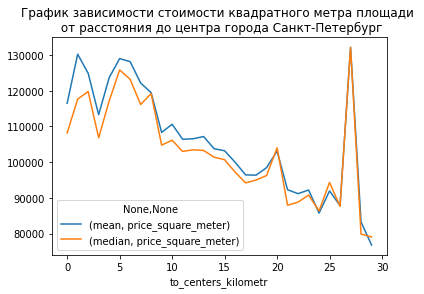

In [130]:
pivot_df_spb = df_spb.pivot_table(index='to_centers_kilometr', values='price_square_meter', aggfunc=['mean', 'median'])
pivot_df_spb.plot(title='График зависимости стоимости квадратного метра площади \n от расстояния до центра города Санкт-Петербург');

Как мы видим, имеется очевидная тенденция к снижению стоимости квадратного метра (как в призме среднего, так и по схожей динамике медианного) с увеличением расстояния до центра города. При этом выглядит интересно резкий пик стоимости на 27 км от центра, что, возможно, связано с наличием на этом расстоянии элитного микрорайона.   

**Вывод:** Нами был проведен исследовательский анализ ряда данных. Так мы изучили параметры ряда стобцов фрейма данных, определили, какие из ряда факторов оказывают влияние на стоимость квартиры и предполжили причину такой взаимосвязи, рассмотрели вопросы скорости, с которой происходит продажа квартир, а также рассчитали, в каком из первых по популярности объявлений населенном пункте наибольшая и наименьшая стоимость квадратного метра, а также зависимость стоимости квадратного метра жилья в Санкт-Петербурге от расстояния до центра города. 

### Общий вывод

Итак, в ходе проведения работы был осуществлен общий обзор данных, после чего возникла необходимость в их предобработке (обработка значительного количества пропусков значений в 14 з 22 колонок датафрейма, изменение типа данных ряда колонок, удаление неявных дубликатов в наименованиях населенных пунктов, проработка аномальных значений, артефактов и выбросов), после чего осуществлен предварительный расчет ряда показателей, которые были добавлены в новые столбцы, изучен ряд параметров и их влияние на формирование стоимости жилья, также был произведены расчеты "быстрого" и "слишком медленного" времени продажи квартиры (по которым возник ряд вопросов), анализ данных по Ленинграской области и г.Санкт-Петербургу.

**Проделав значительную работу мы пришли к следующим выводам:**
1. В ходе изучения ряда столбцов датафрейма установлено, что на ряд из них некоторое влияние оказывает значительное количество типовых построек, так площадь квартиры (общая, жилая и кухни) в значительной степени имеет взаимосвязь с числом комнат, на этажность дома существенно влияет наличие типовых домов (пяти-, девяти- и т.д. этажные квартиры), имеются также и наиболее типовые размеры в плане высоты потоков, также выявлены закономерности, связанные с влиянием на рынок недвижимости сезонных колебаний (рост числа объявлений весной и осенью, а также их спад в период отпусков и новогодних праздников), а также циклического характера деловой активности людей в течение недели (в выходные дни число поданных объявлений о продаже квартиры примерно в 2 раза меньше, чем в будние дни). В ходе изучения параметров ряда характеристик установлено, что:
- наибольшее количество квартир имеет цену в районе **4 млн. руб.**, основная масса распределена в районе от **1 млн. руб.** до **8,5 млн. руб.**;
- по общей площади квартиры в основном располагаются в диапазоне от **20 до 100 кв.м**;
- по жилой площади в диапазоне от **10 до 70 кв.м**;
- нибольшее количество квартир имеют площадь кухни от **5 кв.м** до **15 кв.м**;
- в основном продаются *1, 2 и 3-х комнатные квартиры*, наибольшее количество (почти **8000**) у однокомнатных квартир, двухкомнатных квартир около **7500**, техкомнатных квартир свыше **4500**, количество остальных квартир менее **1000** (из имеющейся выборки);
- наиболее типичные нормы высоты потолка в **2,5 м**, **2,7 м**, **3 м**;
- значительная часть совокупности продаваемых квартир располагаются в пределах до **9 этажа**;
- из общего количества продаваемых квартир **12,95 %** составляют квартиры, находящиеся на первом этаже, а около **13,74 %** квартиры, расположенные на последнем этаже;
- Основная масса продаваемых квартир находятся в пределах от **4 км до 17 км** от центра города;
- сновная часть квартир располагается на расстоянии от **10 км до 60 км** до ближайшего аэропорта.

2. Площадь квартиры существенно влияет на ее стоимость, также имеют влияние и ряд других факторов, в том числе не показывающих существенного значения при определении коэффициента корреляции Пирсона, так, на стоимость квартиры влияет тип этажа(наиболее дешевыми получаются квартиры на 1 этаже, а наиболее дорогими квартиры, не являющиеся первым или последним этажом дома), год и сезон подачи объявления. В результате анализа изменения стоимости квадратного метра квартир в период с 2014 по 2019 год установлено, что в период с 2014 по 2015 год стоимость 1 кваратного метра в медианном формате несколько снизилась, после чего оставалась приблизительно на одном уровне с 2015 п 2017 годы, а с 2017 по 2019 год начала расти


3. Установлено, что характеристика времени, затрачиваемого на продажу квартиры, имеет геометрическое распределение. При этом среднее и медиана данного показателя практически в два раза отличаются друг от друга. Так показатеь медианы составил *91 день*, тогда как среднее значение составило примерно *172 дня*, что обусловлено более существеным влиянием на среднее "хвоста" квартир, продававшихся очень долгое время. При этом при необходимости оценивать, какое количество дней в среднем потратит на продажу жилья конкретный человек, следует использовать именно медианное значение, поскольку ее расчет теснее связан именно с количеством поданных объявлений о продаже квартиры. Также можно предположить, что на данные выводы могут повлиять уточнение механизма расчета того, как замеряется скорость продажи квартиры, поскольку есть  понимание объективно некоторой длительности данного процесса (как минимум регистрация сделки в Росреестре). 


4. Из анализа 10 самых популярых по количеству объявлений населенных пунктов установлено, что в среднем наиболее дорогая стоимость квадратного метра жилья в г. Санкт-Петербуге (среднее значение *около 107 тыс. руб.*, медианное значение *около 102 тыс. руб.*), тогда как в г.Выборге наиболее дешевая (медианное и среднее значение *около 58 тыс. руб.*). 


5. В ходе анализа зависимости средней стоимости квадратного метра в г.Санкт-Петербурге от расстояния до центра города установлена интуитивно понятная тенденция к ее снижению с ростом удаленности. При этом интересен факт наличия существенного роста стоимости квадратного метра квартир на расстоянии 27 км от центра города, причиной чего, возможо, является наличие элитного района на указанном растоянии. 


6. В дальнейшем предполагается желательным введение в сбор данных дополнительных характеристик, имеющих существенное влияние на стоимость жилья, в частности, разумным было бы введение какой-либо категоризации по степени элитности жилья (по аналогии с общепринятой классификации автомобилей, таких как *А-класса, В-класса, S-класса* и т.п.), поскольку имеющиеся данные об апартаментах, квартирах студиях и квартирах открытой планировки явно недостаточны по причинам, во-первых, их малого количества, вероятно не охватывающего весь данный класс, во-вторых, наличия других характеристик влияющих на *элитность* квартир и т.п. Кроме того, рекомендуется разработка алгоритмов, не позволяющих пользователям (включая, возможных недобросовестных) игнорировать указание ряда характеристик, могущих повлиять на стоимость квартиры, сделав, например, их обязательными для заполнения без возможности выбора варианта *пропустить* (например, обязательное указание ближайшего парка, аэропорта, принадлежности жилья к меньшей по стоимости категории апартаментов и т.п.). Также необходимо отметить, что предоставление большего количества сведений о механизмах сбора представленных данных могло бы оказать положительное влияние на формирование более глубоких выводов. Ввиду недостачного информирования возможно некоторое недопонимание в трактовке данных о днях, в течение которых объявление было опубликовано.